# **El problema**

Se nos ha presentado un problema que consiste en diseñar un **modelo de regresión lineal** que pueda determinar con el menor margen de error posible el **precio** que tendrá un ordenador en base a su compañía, modelo, componentes, tamaño, resolución, peso y sistema operativo.


# **Intuición**



Echando un primer vistazo a los datasets y a sus características podemos intuir que las columnas que tendrán más importancia serían las de **Company** ya que hay compañías que hacen valer mucho su marca, el tamaño de la pantalla y componentes básicos como la **CPU** y **GPU**, así como la **RAM**. Con respecto a la **memoria** suponemos que el hecho de tener SSD subirá más el precio que tener un HDD ya que el precio por GB es más alto.

Tambien suponemos que el **SO** tendrá algo de influencia ya que los portátiles sin sistema operativo o con Linux no incluyen a la hora de determinar el precio final del dispositivo ya que son "gratuitos". **TypeName** parece una variable un poco más confusa ya que las categorías no parecen tener líneas claras y lo que una compañía o tienda podría considerar un Notebook, otra podría considerarlo un Netbook.


In [ ]:
import pandas as pd

# Ocultar warnings que no son relevantes para la presentación
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

# Hemos decidido subirlo a gitlab porque es un buen sitio para ficheros estáticos
URL_TRAIN = "https://gitlab.com/villainnumber1/filesml/-/raw/main/train.csv"
URL_TEST  = "https://gitlab.com/villainnumber1/filesml/-/raw/main/test.csv"

X = pd.read_csv(URL_TRAIN, sep=",") # Dataset de entrenamiento
Y = pd.read_csv(URL_TEST,  sep=",") # Dataset de training

display(X)
display(Y)

,LaptopId,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,981,Toshiba,Portege Z30-C-1CV,Notebook,13.3,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 7,1.2kg,1195.00
1,996,HP,Spectre 13-V111dx,Ultrabook,13.3,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 7500U 2.7GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.11kg,1349.00
2,77,Dell,Inspiron 5570,Notebook,15.6,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,8GB,128GB SSD + 1TB HDD,Intel UHD Graphics 620,Windows 10,2.02kg,855.00
3,103,HP,Envy 13-ad009n,Ultrabook,13.3,IPS Panel Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8GB,256GB SSD,Nvidia GeForce MX150,Windows 10,1.38kg,1119.00
4,946,Dell,Latitude 7280,Ultrabook,12.5,Full HD / Touchscreen 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics,Windows 10,1.36kg,1472.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...
907,994,Dell,Inspiron 5378,2 in 1 Convertible,13.3,Full HD / Touchscreen 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.68kg,889.00
908,615,Asus,FX753VD-GC007T (i7-7700HQ/8GB/1TB,Gaming,17.3,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8GB,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1050,Windows 10,3kg,1168.00
909,1063,Dell,Inspiron 5567,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,16GB,2TB HDD,AMD Radeon R7 M445,Windows 10,2.32kg,989.99
910,96,Dell,Inspiron 3567,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8GB,1TB HDD,AMD Radeon R5 M430,Linux,2.2kg,599.90


,LaptopId,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight
0,891,HP,Envy x360,2 in 1 Convertible,13.3,Quad HD+ / Touchscreen 3200x1800,Intel Core i7 7500U 2.7GHz,16GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.42kg
1,1149,Lenovo,ThinkPad X1,2 in 1 Convertible,14.0,IPS Panel Touchscreen 2560x1440,Intel Core i7 6500U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows 10,1.27kg
2,962,Acer,Aspire F5-573G-510L,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,12GB,128GB SSD + 1TB HDD,Nvidia GeForce GTX 950M,Windows 10,2.4kg
3,1204,Asus,FX502VM-DM105T (i7-6700HQ/8GB/1TB/GeForce,Gaming,15.6,Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,8GB,1TB HDD,Nvidia GeForce GTX 1060,Windows 10,2.2kg
4,1139,HP,EliteBook 850,Ultrabook,15.6,Full HD 1920x1080,Intel Core i7 6500U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows 7,1.88kg
...,...,...,...,...,...,...,...,...,...,...,...,...
386,268,HP,Probook 470,Notebook,17.3,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,8GB,1TB HDD,Nvidia GeForce 930MX,Windows 10,2.5kg
387,1278,Dell,Inspiron 3552,Notebook,15.6,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,500GB HDD,Intel HD Graphics,Windows 10,2.20kg
388,299,Asus,ZenBook UX530UQ-PRO,Ultrabook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,16GB,512GB SSD,Nvidia GeForce 940MX,Windows 10,1.63kg
389,162,Dell,Inspiron 3576,Notebook,15.6,Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,256GB SSD,AMD Radeon 520,Windows 10,2.13kg


# **Explorando los datos**

Para tener una perspectiva más amplia de a que nos vamos a enfrentar hemos hecho un **representación gráfica** de todo el dataset, así podremos hacer un mejor preprocesamiento de los datos, teniendo en cuenta de que los datos no están saneados y por lo tanto deberíamos tomarnoslos con una pizca de sal especialmente para las variables con mucha diversidad de valores.

Hacemos un **scatterplot**:

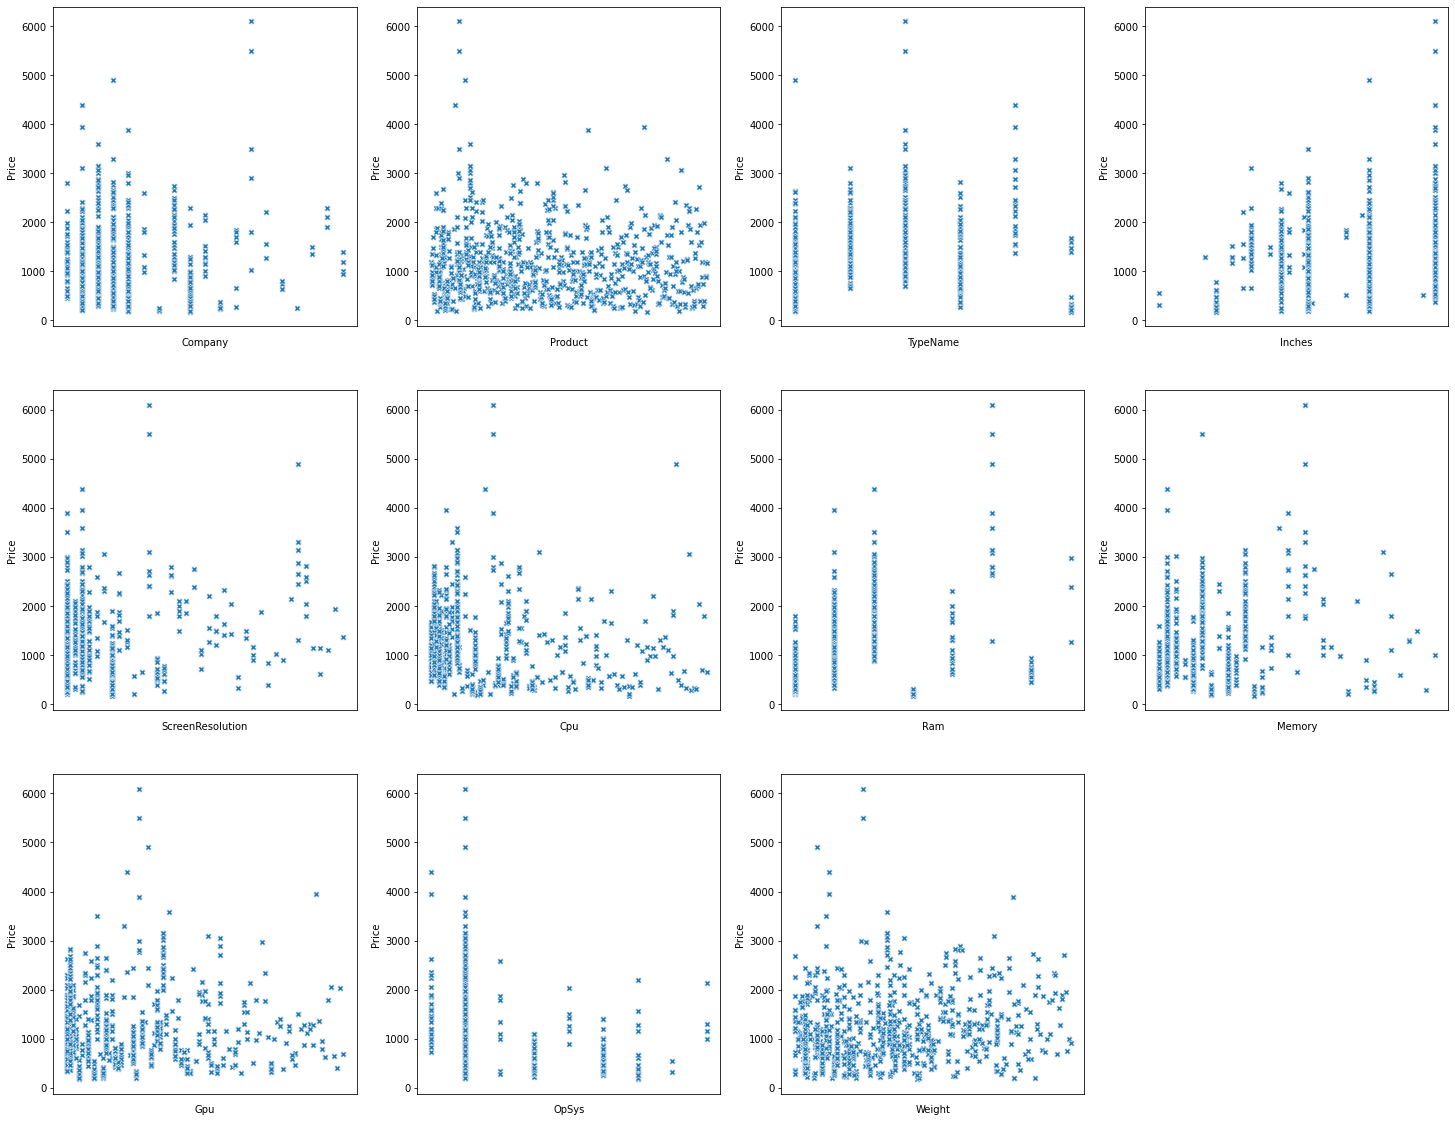

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

labels = [
        "Company", "Product", "TypeName", "Inches", "ScreenResolution", "Cpu", "Ram", "Memory", "Gpu", "OpSys", "Weight",
    ]

fig, axs = plt.subplots(3, 4, figsize=(25, 20))
fig.delaxes(axs[2][3]) # Eliminar el plot vacio

i, j = 0, 0

for label in labels:
  #sns.kdeplot(X[label], ax=axs[i][j])
  s = sns.scatterplot(data=X, x=label, y="Price", marker = "X", ax=axs[i][j])
  j+=1
  s.set(xticklabels=[])
  s.tick_params(bottom=False)
  
  if (j%4==0): 
    j=0
    i+=1

Podemos ver que **Product** y **Weight** tienen muchos valores únicos, mientras que en Inches los valores se tienden a concentrar en unas columnas concretas. **Memory**, **ScreenResolution**, **Cpu** y **Gpu** tienen poco valores con más densidad y algunos outliers.

Y un **density plot** para variables continuas e **histogram** para categóricas:

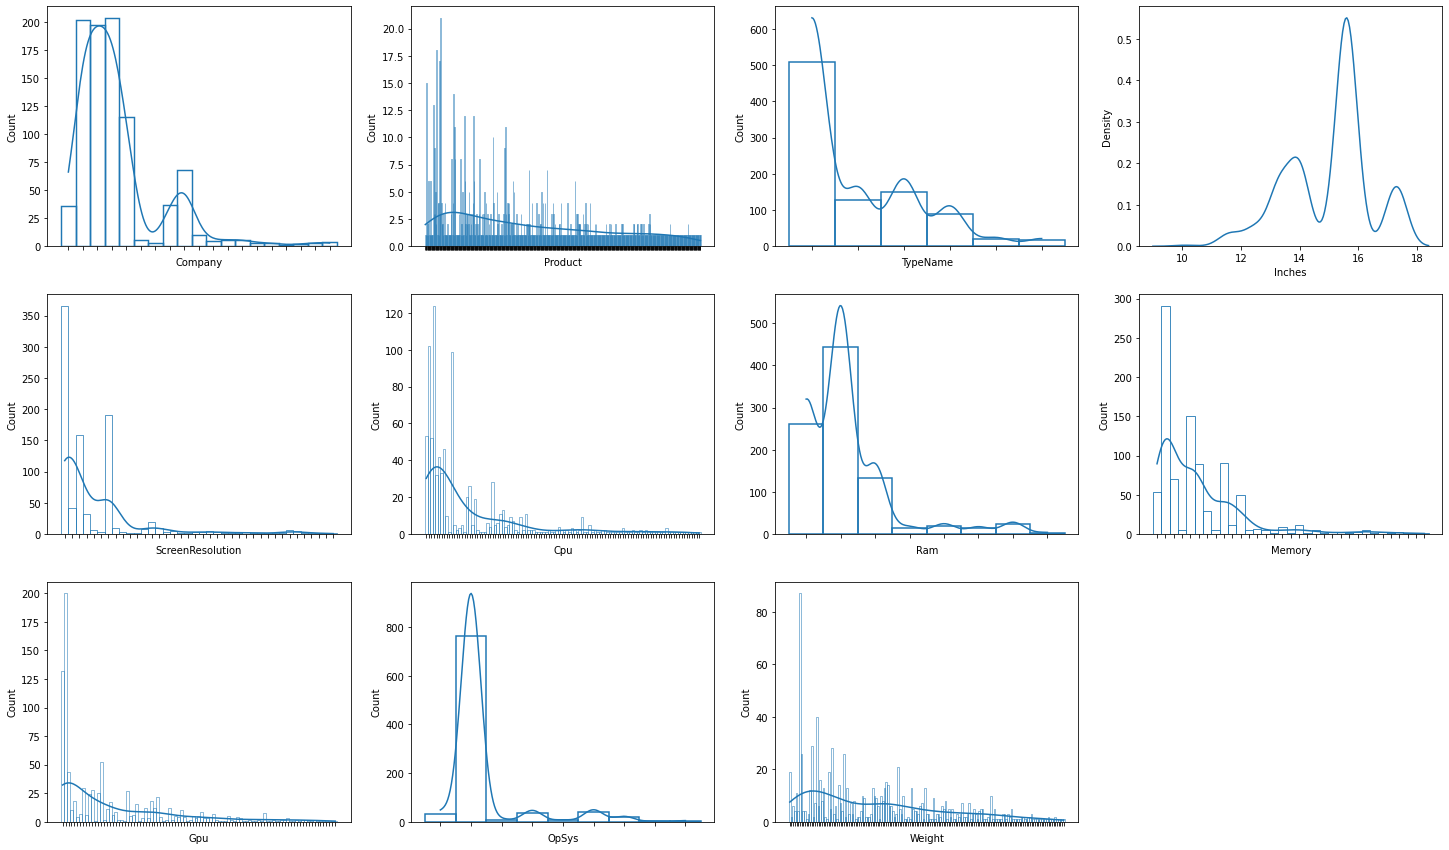

In [ ]:
labels = [
        "Company", "Product", "TypeName", "Inches", "ScreenResolution", "Cpu", "Ram", "Memory", "Gpu", "OpSys", "Weight",
    ]

def kde(X, labels):
  # El numero de caracteristicas que tienen tipo numerico, para decidir las dimensiones
  n_of_numerical_features = len([ True for f in X if type(X[f][0]) != str ])
  
  fig, axs = plt.subplots(3, 4, figsize=(25, 15))
  fig.delaxes(axs[2][3]) # Elimnar plots vacios
  
  i = 0
  for label in labels:
    if type(X[label][0]) != str:
      sns.kdeplot(X[label], ax=axs[i//4, i%4])
    else:
      aux = sns.histplot(X[label], ax=axs[i//4, i%4], kde=True, fill=False)
      #axs[i//4, i%4].tick_params(axis='x', rotation=90)

      #if label not in ["Ram", "OpSys"]:
      aux.set_xticklabels(aux.get_xticklabels(), rotation = 80, horizontalalignment = 'right')
    
    i += 1

kde(X, labels)


En estos gráficos podemos ver que la mayoría de personas utilizan un **Notebook** y una pantalla de alrededor de **16 pulgadas**. La cantidad de memoria más típica son **8GB** y utilizan **Windows 10**.

Estamos quitando los ticks para mejorar la visiblidad ya que muchas de las variables tienen muchos valores poco únicos.

# **Preprocesando los datos**

El **Product** no parece tener una estructura demasiado intuitiva de entender pero mirándolo detenidamente se pueden identificar las **series** del portatil (ej Inspiron) y el **modelo** de la serie (ej 5567). También contiene datos algo redundantes como la repetición de algunas características que no hemos comprobado por el trabajo que conllevaría (ej (i7-7700HQ/8GB/TB)) y por lo tanto hemos dado por hecho que son correctas. Para un proyecto más serio no sobraría tenerlos en cuenta a la hora de sanear y comprobar la integridad de los datos.

Aunque puede parecer excesivo separar las "subseries" ya que tiene claves bastante únicas, pensamos que es interesante ya que las series pueden aportar información sobre el precio de esa determinada serie de portatiles, y no queremos eliminar subseries por si puede aportar algo de información.

In [ ]:
# Obtiene la columna de series de Product
def handle_product_series(product):
  if " " in product and "(" not in product:
    return product.split()[0].strip()
  elif "-" in product:
    return product.split("-")[0].strip()

# Obtiene la columna de subseries de Product
def handle_product_subseries(product):
  series = handle_product_series(product)

  if not series:
    return ""
  else:
    subseries = product.replace(series, "")

    if "(" in subseries:
      subseries = subseries.split("(")[0]
    
    if subseries.startswith("-"):
      subseries = subseries[1:]

    return subseries.strip()

df_product = pd.DataFrame(X["Product"])
df_series  = pd.DataFrame(X["Product"].map(handle_product_series)).rename(columns={"Product": "Series"})
df_subseries  = pd.DataFrame(X["Product"].map(handle_product_subseries)).rename(columns={"Product": "Subseries"})

pd.concat([df_product, df_series, df_subseries], axis=1)

,Product,Series,Subseries
0,Portege Z30-C-1CV,Portege,Z30-C-1CV
1,Spectre 13-V111dx,Spectre,13-V111dx
2,Inspiron 5570,Inspiron,5570
3,Envy 13-ad009n,Envy,13-ad009n
4,Latitude 7280,Latitude,7280
...,...,...,...
907,Inspiron 5378,Inspiron,5378
908,FX753VD-GC007T (i7-7700HQ/8GB/1TB,FX753VD,GC007T
909,Inspiron 5567,Inspiron,5567
910,Inspiron 3567,Inspiron,3567


A primera vista, puede parecer poco lógico e intuitivo ampliar el número de columnas para no aportar niguna información diferente a la que hay en la columna original. Sin embargo, el dividir la columna en dos el MAE baja.

La columna de **ScreenResolution** parece contener el número de pixeles por alto y ancho, así como el **tipo de panel** de la pantalla (ej IPS) y si es táctil o no. Al igual que la columna anterior también contiene algunos datos algo redundantes como Full HD que no hemos tenido en cuenta ya que viene supuesta en el **número de píxeles**. Otra columna que hemos pensado que podría resultar interesante es el ratio (Ej 16:9) de la **pantalla**, ya que hay personas que la tienen en cuenta para ver videos o jugar a juegos.

La creación de estas nuevas columnas nos han ayudado a mejorar el modelo considerablemente.

In [ ]:
import re

def handle_screen_pixels(sr):
  resolution = re.findall("\d+x\d+", sr)[0]
  w, h = [ int(_) for _ in resolution.split("x") ] # Ancho y alto

  return w*h

def handle_screen_ratio(sr):
  resolution = re.findall("\d+x\d+", sr)[0]
  w, h = [ int(_) for _ in resolution.split("x") ] # Ancho y alto

  ratios = {
      (1366, 768): "16:9",
      (1440, 900): "16:10",
      (1600, 900): "16:9",
      (1920, 1080): "16:9",
      (1920, 1200): "16:10",
      (2160, 1440): "3:2",
      (2256, 1504): "3:2",
      (2304, 1440): "16:10",
      (2400, 1600): "3:2",
      (2560, 1440): "16:9",
      (2560, 1600): "16:10",
      (2736, 1824): "3:2",
      (2880, 1800): "16:10",
      (3200, 1800): "16:9",
      (3840, 2160): "16:9",
  }

  if (w, h) in ratios:
    return ratios[(w, h)]
  else:
    print("Ratio doesnt exist", (w, h))
    return 0

def handle_is_screen_ips(sr):
  return "IPS" in sr

def handle_has_touchscreen(sr):
  return "Touchscreen" in sr


df_sr              = pd.DataFrame(X["ScreenResolution"])
df_pixels          = pd.DataFrame(X["ScreenResolution"].map(handle_screen_pixels)).rename(columns={"ScreenResolution": "ScreenPixels"})
df_ratio           = pd.DataFrame(X["ScreenResolution"].map(handle_screen_ratio)).rename(columns={"ScreenResolution": "ScreenRatio"})
df_is_ips          = pd.DataFrame(X["ScreenResolution"].map(handle_is_screen_ips)).rename(columns={"ScreenResolution": "IsScreenIPS"})
df_has_touchscreen = pd.DataFrame(X["ScreenResolution"].map(handle_has_touchscreen)).rename(columns={"ScreenResolution": "HasTouchscreen"})

pd.concat([df_sr, df_pixels, df_ratio, df_is_ips, df_has_touchscreen], axis=1)


,ScreenResolution,ScreenPixels,ScreenRatio,IsScreenIPS,HasTouchscreen
0,Full HD 1920x1080,2073600,16:9,False,False
1,IPS Panel Full HD / Touchscreen 1920x1080,2073600,16:9,True,True
2,Full HD 1920x1080,2073600,16:9,False,False
3,IPS Panel Full HD 1920x1080,2073600,16:9,True,False
4,Full HD / Touchscreen 1920x1080,2073600,16:9,False,True
...,...,...,...,...,...
907,Full HD / Touchscreen 1920x1080,2073600,16:9,False,True
908,Full HD 1920x1080,2073600,16:9,False,False
909,Full HD 1920x1080,2073600,16:9,False,False
910,Full HD 1920x1080,2073600,16:9,False,False



Para simplificar la **CPU** hemos añadido 4 columnas, una identificando la **compañía** (Ej Intel), otra **series** (Ej i7) y **modelo** (Ej 7500U), y por último la **frecuencia de reloj** del procesador. También hemos pensado que podría ser interesante añadir la **gama** de la CPU (Alta, Media, Baja), pero al añadirla nos aumenta el score negativamente, asi que hemos decidico no procesar esta característica.

In [ ]:
def parse_cpu(cpu):
  amd_regex = "AMD[^\d]+"
  intel_regex = "Intel[^\d]+(?:\d[\s-])?"
  samsung_regex = "Samsung[\w\s]+"

  res = re.findall(amd_regex+"|"+intel_regex+"|"+samsung_regex, cpu)

  if res:
    res = res[0]
    if res[-1] == "-": res = res[:-1] # Quitar - al final
    
    return res.strip()
  else:
    print("CPU not found", cpu)
    return ""

def handle_cpu_speed(cpu):
  return float( cpu.split()[-1][:-3] )

def handle_cpu_brand(cpu):
  return parse_cpu(cpu).split()[0].strip()

def handle_cpu_model(_cpu):
  cpu = parse_cpu(_cpu)
  brand = handle_cpu_brand(_cpu)

  return cpu.replace(brand, "").strip()

def handle_cpu_submodel(cpu):
  brand = handle_cpu_brand(cpu)
  model = handle_cpu_model(cpu)

  submodel = cpu.replace(brand, "").replace(model, "").strip().split()[0].strip()

  if submodel[0] == "-":
    submodel = submodel[1:]
  
  return submodel

df_cpu          = pd.DataFrame(X["Cpu"])
df_cpu_speed    = pd.DataFrame(X["Cpu"].map(handle_cpu_speed)).rename(columns={"Cpu": "CPUSpeed"})
df_cpu_brand    = pd.DataFrame(X["Cpu"].map(handle_cpu_brand)).rename(columns={"Cpu": "CPUBrand"})
df_cpu_model    = pd.DataFrame(X["Cpu"].map(handle_cpu_model)).rename(columns={"Cpu": "CPUModel"})
df_cpu_submodel = pd.DataFrame(X["Cpu"].map(handle_cpu_submodel)).rename(columns={"Cpu": "CPUSubmodel"})

pd.concat([df_cpu, df_cpu_brand, df_cpu_model, df_cpu_submodel, df_cpu_speed], axis=1)

,Cpu,CPUBrand,CPUModel,CPUSubmodel,CPUSpeed
0,Intel Core i5 6200U 2.3GHz,Intel,Core i5,6200U,2.3
1,Intel Core i7 7500U 2.7GHz,Intel,Core i7,7500U,2.7
2,Intel Core i7 8550U 1.8GHz,Intel,Core i7,8550U,1.8
3,Intel Core i7 7500U 2.7GHz,Intel,Core i7,7500U,2.7
4,Intel Core i5 7200U 2.5GHz,Intel,Core i5,7200U,2.5
...,...,...,...,...,...
907,Intel Core i5 7200U 2.5GHz,Intel,Core i5,7200U,2.5
908,Intel Core i7 7700HQ 2.8GHz,Intel,Core i7,7700HQ,2.8
909,Intel Core i7 7500U 2.7GHz,Intel,Core i7,7500U,2.7
910,Intel Core i7 7500U 2.7GHz,Intel,Core i7,7500U,2.7


La estructura de la **GPU** es similar a la de la **CPU**. Marca, Modelo y número de serie (Ej: Intel HD Graphics 520)

In [ ]:
def parse_gpu(gpu):
  regex_amd = "AMD (?:FirePro|R\d|Radeon (?:r\d?\w?)?)"
  regex_arm = "ARM Mali"
  regex_intel = "Intel [^\d]*"
  regex_nvidia = "Nvidia (?:Quadro|(?:GeForce)?\s?)"

  res = re.findall(regex_amd+"|"+regex_arm+"|"+regex_intel+"|"+regex_nvidia, gpu)

  if res:
    return res[0].strip()
  else:
    print("Model not found", gpu, res)
    return ""

def handle_gpu_brand(gpu):
  model = parse_gpu(gpu)
  return model.split()[0]

def handle_gpu_model_number(gpu):
  model = parse_gpu(gpu)
  model_number = gpu.replace(model, "").strip() # El numero es lo que se queda al quitarle el modelo

  n = re.findall("\d+", model_number) # Obtener el numero

  if not n:
    return 0
  else:
    return int(n[0].strip())

def handle_gpu_model(gpu):
  model = parse_gpu(gpu)
  brand = handle_gpu_brand(gpu)

  #print(model, brand, model.replace(brand, ""))

  return model.replace(brand, "").strip() # El espacio al principio

#def handle_gpu_model_gama(row):
#  model = parse_gpu(row)
#  model_number = row["Gpu"].replace(model, "").strip() # El numero es lo que se queda al quitarle el modelo

#  n = re.findall("\d+", model_number) # Obtener el numero

#  if not n:
#    return "Indeterminada" # No lo ha encontrado o no lo tiene. Si pongo 0 aumenta. Puede ser overfitting.
#  else:
#    #"Muy Alta" if int(n[0].strip()) > 1000 else 
#    return "Alta" if int(n[0].strip()) > 700 else "Media" if int(n[0].strip()) > 500 else "Baja"

df_gpu          = pd.DataFrame(X["Gpu"])
df_gpu_brand    = pd.DataFrame(X["Gpu"].map(handle_gpu_brand)).rename(columns={"Gpu": "GPUBrand"})
df_gpu_model    = pd.DataFrame(X["Gpu"].map(handle_gpu_model)).rename(columns={"Gpu": "GPUModel"})
df_gpu_model_number = pd.DataFrame(X["Gpu"].map(handle_gpu_model_number)).rename(columns={"Gpu": "GPUModelNumber"})

pd.concat([df_gpu, df_gpu_brand, df_gpu_model, df_gpu_model_number], axis=1)

,Gpu,GPUBrand,GPUModel,GPUModelNumber
0,Intel HD Graphics 520,Intel,HD Graphics,520
1,Intel HD Graphics 620,Intel,HD Graphics,620
2,Intel UHD Graphics 620,Intel,UHD Graphics,620
3,Nvidia GeForce MX150,Nvidia,GeForce,150
4,Intel HD Graphics,Intel,HD Graphics,0
...,...,...,...,...
907,Intel HD Graphics 620,Intel,HD Graphics,620
908,Nvidia GeForce GTX 1050,Nvidia,GeForce,1050
909,AMD Radeon R7 M445,AMD,Radeon,7
910,AMD Radeon R5 M430,AMD,Radeon,5


Para la **RAM** y el peso (**Weight**) hemos quitado las unidades para poder trabajar con referencias numéricas

In [ ]:
pd.DataFrame(X["Ram"].map(lambda ram: int(ram[:-2])))

,Ram
0,4
1,8
2,8
3,8
4,8
...,...
907,8
908,8
909,16
910,8


In [ ]:
pd.DataFrame(X["Weight"].map(lambda weight: float(weight[:-2])))

,Weight
0,1.20
1,1.11
2,2.02
3,1.38
4,1.36
...,...
907,1.68
908,3.00
909,2.32
910,2.20


Por otro lado, para el sistema operativo hemos pensado que podría ayudar añadir una columna especificando si el **SO** en cuestión es o no gratis, ya que podría influir en el precio final del producto (Ej: Linux, No OS = True / Mac Os = False). Nos ha ayudado a mejorar nuestro score.

In [ ]:
def handle_is_os_free(os):
  return os in ["No OS", "Linux"] # Cambiar

df_opsys = pd.DataFrame(X["OpSys"])
df_is_os_free = pd.DataFrame(X["OpSys"].map(handle_is_os_free)).rename(columns={"OpSys": "IsOSFree"})

pd.concat([df_opsys, df_is_os_free], axis=1)

,OpSys,IsOSFree
0,Windows 7,False
1,Windows 10,False
2,Windows 10,False
3,Windows 10,False
4,Windows 10,False
...,...,...
907,Windows 10,False
908,Windows 10,False
909,Windows 10,False
910,Linux,True



Finalmente para **Memory** hemos pensado que sería útil saber la **cantidad** total  de almacenamiento (Ej: 256GB SSD -> 256), así como los **tipos** de discos que contiene el portatil (Ej: 256GB SSD, HasSSD = True, HasHDD = False, HasFlashStorage = False, HasHybrid = False). Lo que ha hecho que nuestro modelo aprenda mejor.

Como nota decir que hemos intentado otras aproximaciones como hacer columnas con la cantidad de almacenamiento de cada tipo de discos o columnas con el número de discos que hay en un portatil, pero no solo no han ayudado sino que han subido el error considerablemente.

In [ ]:
def parse_memory(mem):
   regex_memoria = "(\d*\.?\d+)(\w+) (SSD|HDD|Flash Storage|Hybrid)" # Regex para identificar la memoria
   return [ x for x in re.findall(regex_memoria, mem) ] # Lista con tuplas de todos los discos encontrados

def handle_storage_capacity(mem):
  productos = parse_memory(mem)
  capacity = sum([
      float(producto[0]) * (1000 if producto[1] == "TB" else 1) for producto in productos
  ])

  return capacity

def handle_has_disc(mem, discType):
  productos = parse_memory(mem)
  return any([ producto[2] == discType for producto in productos ])

df_memory = pd.DataFrame(X["Memory"])
df_storageCapacity = pd.DataFrame(X["Memory"].map(handle_storage_capacity)).rename(columns={"Memory": "StorageCapacity"})
df_has_hdd = pd.DataFrame(X["Memory"].map(lambda mem: handle_has_disc(mem, "HDD"))).rename(columns={"Memory": "HasHDD"})
df_has_ssd = pd.DataFrame(X["Memory"].map(lambda mem: handle_has_disc(mem, "SSD"))).rename(columns={"Memory": "HasSSD"})
df_has_hybrid = pd.DataFrame(X["Memory"].map(lambda mem: handle_has_disc(mem, "Hybrid"))).rename(columns={"Memory": "HasHybrid"})
df_has_flashStorage = pd.DataFrame(X["Memory"].map(lambda mem: handle_has_disc(mem, "Flash Storage"))).rename(columns={"Memory": "HasFlashStorage"})


memory = pd.concat([df_memory, df_storageCapacity, df_has_hdd, df_has_ssd, df_has_hybrid, df_has_flashStorage], axis=1)
display(memory)

,Memory,StorageCapacity,HasHDD,HasSSD,HasHybrid,HasFlashStorage
0,128GB SSD,128.0,False,True,False,False
1,256GB SSD,256.0,False,True,False,False
2,128GB SSD + 1TB HDD,1128.0,True,True,False,False
3,256GB SSD,256.0,False,True,False,False
4,256GB SSD,256.0,False,True,False,False
...,...,...,...,...,...,...
907,256GB SSD,256.0,False,True,False,False
908,128GB SSD + 1TB HDD,1128.0,True,True,False,False
909,2TB HDD,2000.0,True,False,False,False
910,1TB HDD,1000.0,True,False,False,False


Para ver la proporción de HDD, SSD, Hybrid y FlashStorage, como son variables booleana vamos a usar diagramas pie, para visualizar la frecuencia en la que nuestros portatiles tienen o no estas características.

Somos conscientes que la información que reflejan no es 100% exacta, puede resultar ambigua, pero para saber si nuestros datos presentan más o menos dispositivos de un tipo determinado de memoria resulta útil.

{True: 394, False: 518}
{True: 603, False: 309}
{True: 7, False: 905}
{True: 50, False: 862}


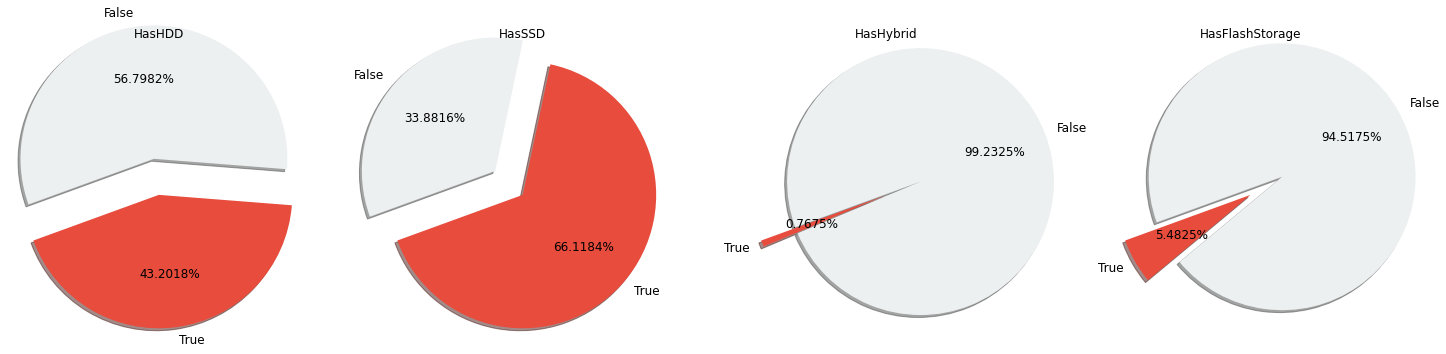

In [ ]:
def pie (labels):
  colors = ['#E74C3C', '#ECF0F1']
  fig, axs = plt.subplots(1,4,figsize=(25,25))
  i=0

  for label in labels:

    numeros = [True, False]
    data = list(memory[label])

    ocurrencias = {} 

    for row in numeros:
      ocurrencia = data.count(row)
      ocurrencias[row]=ocurrencia
      ocurrencia = 0
      
    #print(ocurrencias)

    # Creating pie 
    axs[i].pie(list(ocurrencias.values()), labels = numeros, shadow=True, explode = [0, 0.3], startangle=200, colors = colors, radius = 1.1, autopct='%.4f%%', pctdistance=.6 , textprops = {'fontsize': 12})
    axs[i].set_title(label)
    i += 1

label = ["HasHDD", "HasSSD", "HasHybrid" , "HasFlashStorage"]
pie(label)

Las columnas de **Company** y **TypeName** contienen información bastante simple, por lo que no las hemos modificado ni hemos añadido nuevas columnas.

# **Saneando los datos**

Antes de hacer nada con los datos observamos que hay datos inconsistentes entre los ficheros de
prueba y test, GPUs que son la misma pero están escritas de manera diferente o typos por algunos lugares, así que saneamos los datos antes que nada.

In [ ]:
URL_TRAIN_CLEAN = "https://gitlab.com/villainnumber1/filesml/-/raw/main/train_clean.csv"
URL_TEST_CLEAN  = "https://gitlab.com/villainnumber1/filesml/-/raw/main/test_clean.csv"

####
# Enlace al código usado para sanear el dataset: https://gitlab.com/villainnumber1/filesml/-/blob/main/test.py
####

# Redefinimos X e Y porque ya no vamos a usar las anteriores
X_clean = pd.read_csv(URL_TRAIN_CLEAN, sep=",")
Y_clean = pd.read_csv(URL_TEST_CLEAN,  sep=",")

print("X Limpio")
display(X_clean)
print("\nY Limpio")
display(Y_clean)

X Limpio


,LaptopId,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,981,toshiba,portege z30-c-1cv,notebook,13.3,full hd 1920x1080,intel core i5 6200u 2.3ghz,4GB,128GB SSD,intel hd graphics 520,Windows 7,1.2kg,1195.00
1,996,hp,spectre 13-v111dx,ultrabook,13.3,ips panel full hd / touchscreen 1920x1080,intel core i7 7500u 2.7ghz,8GB,256GB SSD,intel hd graphics 620,Windows 10,1.11kg,1349.00
2,77,dell,inspiron 5570,notebook,15.6,full hd 1920x1080,intel core i7 8550u 1.8ghz,8GB,128GB SSD + 1TB HDD,intel uhd graphics 620,Windows 10,2.02kg,855.00
3,103,hp,envy 13-ad009n,ultrabook,13.3,ips panel full hd 1920x1080,intel core i7 7500u 2.7ghz,8GB,256GB SSD,nvidia geforce 150mx,Windows 10,1.38kg,1119.00
4,946,dell,latitude 7280,ultrabook,12.5,full hd / touchscreen 1920x1080,intel core i5 7200u 2.5ghz,8GB,256GB SSD,intel hd graphics,Windows 10,1.36kg,1472.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...
907,994,dell,inspiron 5378,2 in 1 convertible,13.3,full hd / touchscreen 1920x1080,intel core i5 7200u 2.5ghz,8GB,256GB SSD,intel hd graphics 620,Windows 10,1.68kg,889.00
908,615,asus,fx753vd-gc007t (i7-7700hq/8gb/1tb,gaming,17.3,full hd 1920x1080,intel core i7 7700hq 2.8ghz,8GB,128GB SSD + 1TB HDD,nvidia geforce 1050,Windows 10,3kg,1168.00
909,1063,dell,inspiron 5567,notebook,15.6,full hd 1920x1080,intel core i7 7500u 2.7ghz,16GB,2TB HDD,amd radeon r7 m445,Windows 10,2.32kg,989.99
910,96,dell,inspiron 3567,notebook,15.6,full hd 1920x1080,intel core i7 7500u 2.7ghz,8GB,1TB HDD,amd radeon r5 m430,Linux,2.2kg,599.90



Y Limpio


,LaptopId,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight
0,891,hp,envy x360,2 in 1 convertible,13.3,quad hd+ / touchscreen 3200x1800,intel core i7 7500u 2.7ghz,16GB,256GB SSD,intel hd graphics 620,Windows 10,1.42kg
1,1149,lenovo,thinkpad x1,2 in 1 convertible,14.0,ips panel touchscreen 2560x1440,intel core i7 6500u 2.5ghz,8GB,256GB SSD,intel hd graphics 520,Windows 10,1.27kg
2,962,acer,aspire f5-573g-510l,notebook,15.6,full hd 1920x1080,intel core i5 7200u 2.5ghz,12GB,128GB SSD + 1TB HDD,nvidia geforce 950m,Windows 10,2.4kg
3,1204,asus,fx502vm-dm105t (i7-6700hq/8gb/1tb/geforce,gaming,15.6,full hd 1920x1080,intel core i7 6700hq 2.6ghz,8GB,1TB HDD,nvidia geforce 1060,Windows 10,2.2kg
4,1139,hp,elitebook 850,ultrabook,15.6,full hd 1920x1080,intel core i7 6500u 2.5ghz,8GB,256GB SSD,intel hd graphics 520,Windows 7,1.88kg
...,...,...,...,...,...,...,...,...,...,...,...,...
386,268,hp,probook 470,notebook,17.3,full hd 1920x1080,intel core i7 8550u 1.8ghz,8GB,1TB HDD,nvidia geforce 930mx,Windows 10,2.5kg
387,1278,dell,inspiron 3552,notebook,15.6,1366x768,intel celeron dual core n3050 1.6ghz,2GB,500GB HDD,intel hd graphics,Windows 10,2.20kg
388,299,asus,zenbook ux530uq-pro,ultrabook,15.6,full hd 1920x1080,intel core i7 7500u 2.7ghz,16GB,512GB SSD,nvidia geforce 940mx,Windows 10,1.63kg
389,162,dell,inspiron 3576,notebook,15.6,full hd 1920x1080,intel core i5 8250u 1.6ghz,8GB,256GB SSD,amd radeon 520,Windows 10,2.13kg


Podemos observar que el número de clases para la CPU y GPU se han reducido, lo cual reduce la complejidad de los datasets, evita confusiones y ayuda a bajar un poco el error. Las otras columnas no han necesitado de muchas modificaciones. La columna de Compañía también tenía algun typo pero no era demasiado significativo.

In [ ]:
print("X:")
print("CPU:", len(set(X["Cpu"])))
print("GPU:", len(set(X["Gpu"])))

print("\nX saneada:")
print("CPU:", len(set(X_clean["Cpu"])))
print("GPU:", len(set(X_clean["Gpu"])))

print("\nY:")
print("CPU:", len(set(Y["Cpu"])))
print("GPU:", len(set(Y["Gpu"])))

print("\nY saneada:")
print("CPU:", len(set(Y_clean["Cpu"])))
print("GPU:", len(set(Y_clean["Gpu"])))

X:
CPU: 108
GPU: 93

X saneada:
CPU: 84
GPU: 75

Y:
CPU: 61
GPU: 67

Y saneada:
CPU: 57
GPU: 62


# **Putting it all together**

Hecho esto pasamos a añadir las nuevas columnas tanto 

In [ ]:
import re

########################
# Handlers de columnas #
########################

###########
# Product #
###########

def handle_product_series(row):
  product = row["Product"]

  if " " in product and "(" not in product:
    return product.split()[0].strip()
  elif "-" in product:
    return product.split("-")[0].strip()

def handle_product_subseries(row):
  product = row["Product"]
  series = handle_product_series(row)

  if not series:
    return ""
  else:
    subseries = product.replace(series, "")

    if "(" in subseries:
      subseries = subseries.split("(")[0]
    
    if subseries.startswith("-"):
      subseries = subseries[1:]

    return subseries.strip()

##########
# Screen #
##########

def handle_screen_pixels(row):
  resolution = re.findall("\d+x\d+", row["ScreenResolution"])[0]
  w, h = [ int(_) for _ in resolution.split("x") ] # Ancho y alto

  return w*h

def handle_screen_ratio(row):
  resolution = re.findall("\d+x\d+", row["ScreenResolution"])[0]
  w, h = [ int(_) for _ in resolution.split("x") ] # Ancho y alto

  ratios = {
      (1366, 768): "16:9",
      (1440, 900): "16:10",
      (1600, 900): "16:9",
      (1920, 1080): "16:9",
      (1920, 1200): "16:10",
      (2160, 1440): "3:2",
      (2256, 1504): "3:2",
      (2304, 1440): "16:10",
      (2400, 1600): "3:2",
      (2560, 1440): "16:9",
      (2560, 1600): "16:10",
      (2736, 1824): "3:2",
      (2880, 1800): "16:10",
      (3200, 1800): "16:9",
      (3840, 2160): "16:9",
  }

  if (w, h) in ratios:
    return ratios[(w, h)]
  else:
    print("Ratio doesnt exist", (w, h))
    return 0

def handle_is_screen_ips(row):
  return "ips" in row["ScreenResolution"]

def handle_has_touchscreen(row):
  res = row["ScreenResolution"]
  return "touchscreen" in res

#######
# CPU #
#######

def parse_cpu(row):
  #return row["Cpu"].split()[1]
  amd_regex = "amd[^\d]+"
  intel_regex = "intel[^\d]+(?:\d[\s-])?"
  samsung_regex = "samsung[\w\s]+"

  res = re.findall(amd_regex+"|"+intel_regex+"|"+samsung_regex, row["Cpu"])

  if res:
    res = res[0]
    if res[-1] == "-": res = res[:-1] # Quitar - al final
    
    return res.strip()
  else:
    print("CPU not found")
    return ""

def handle_cpu_speed(row):
  return float( row["Cpu"].split()[-1][:-3] )

def handle_cpu_brand(row):
  cpu = parse_cpu(row)

  return cpu.split()[0].strip()

def handle_cpu_model(row):
  cpu = parse_cpu(row)
  brand = handle_cpu_brand(row)

  return cpu.replace(brand, "").strip()

def handle_cpu_submodel(row):
  cpu = row["Cpu"]
  brand = handle_cpu_brand(row)
  model = handle_cpu_model(row)

  submodel = cpu.replace(brand, "").replace(model, "").strip().split()[0].strip()

  if submodel[0] == "-":
    submodel = submodel[1:]
  
  return submodel

def handle_cpu_antiguedad(row):
  model = parse_gpu(row)
  model_number = row["Cpu"].replace(model, "").strip() # El numero es lo que se queda al quitarle el modelo

  n = re.findall("(\d{4})", model_number) # Obtener el numero

  return n

#######
# GPU #
#######

def parse_gpu(row):
  regex_amd = "amd (?:firepro|r\d|radeon (?:r\d?\w?)?)"
  regex_arm = "arm mali"
  regex_intel = "intel [^\d]*"
  regex_nvidia = "nvidia (?:quadro|(?:geforce)?\s?)"

  res = re.findall(regex_amd+"|"+regex_arm+"|"+regex_intel+"|"+regex_nvidia, row["Gpu"])

  if res:
    return res[0].strip()
  else:
    print("Model not found", row["Gpu"], res)
    return ""

def handle_gpu_brand(row):
  model = parse_gpu(row)
  return model.split()[0]

def handle_gpu_model_number(row):
  model = parse_gpu(row)
  model_number = row["Gpu"].replace(model, "").strip() # El numero es lo que se queda al quitarle el modelo

  n = re.findall("\d+", model_number) # Obtener el numero

  if not n:
    return 2 # No lo ha encontrado o no lo tiene. Si pongo 0 aumenta. Puede ser overfitting.
  else:
    return int(n[0].strip())

def handle_gpu_model(row):
  model = parse_gpu(row)
  brand = handle_gpu_brand(row)

  #print(model, brand, model.replace(brand, ""))

  return model.replace(brand, "").strip() # El espacio al principio

def handle_gpu_model_gama(row):
  model = parse_gpu(row)
  model_number = row["Gpu"].replace(model, "").strip() # El numero es lo que se queda al quitarle el modelo

  n = re.findall("\d+", model_number) # Obtener el numero

  if not n:
    return "Indeterminada" # No lo ha encontrado o no lo tiene. Si pongo 0 aumenta. Puede ser overfitting.
  else:
    #"Muy Alta" if int(n[0].strip()) > 1000 else 
    return "Alta" if int(n[0].strip()) > 700 else "Media" if int(n[0].strip()) > 500 else "Baja"

###########
# Storage #
###########

def parse_memory(mem):
   regex_memoria = "(\d*\.?\d+)(\w+) (SSD|HDD|Flash Storage|Hybrid)" # Regex para identificar la memoria
   return [ x for x in re.findall(regex_memoria, mem) ] # Lista con tuplas de todos los discos encontrados

def handle_storage_capacity(row):
  productos = parse_memory(row["Memory"])
  capacity = sum([
      float(producto[0]) * (1000 if producto[1] == "TB" else 1) for producto in productos
  ])

  return capacity

def handle_has_disc(row, discType):
  productos = parse_memory(row["Memory"])
  return any([ producto[2] == discType for producto in productos ])

######
# OS #
######

def handle_is_os_free(row):
  return row["OpSys"] in ["No OS", "Linux"] # Cambiar

def add_column(df, columna, f):
  df[columna] = df.apply(lambda row: f(row), axis=1)

def map_column(self, columna, f):
  df[columna] = [ f(val) for val in df[columna] ]

###############################################################
# Aplicamos las funciones a las columnas de X_clean y Y_clean #
###############################################################

for df in X_clean, Y_clean:
  add_column(df, "Series",           handle_product_series)
  add_column(df, "Subseries",        handle_product_subseries)
  add_column(df, "StorageCapacity",  handle_storage_capacity)
  add_column(df, "HasHHD",           lambda row: handle_has_disc(row, "SSD"))
  add_column(df, "HasSSD",           lambda row: handle_has_disc(row, "HDD"))
  add_column(df, "HasHybrid",        lambda row: handle_has_disc(row, "Hybrid"))
  add_column(df, "HasFlashStorage",  lambda row: handle_has_disc(row, "Flash Storage"))
  add_column(df, "ScreenPixels",     handle_screen_pixels)
  add_column(df, "ScreenRatio",      handle_screen_ratio)
  add_column(df, "IsScreenIPS",      handle_is_screen_ips)
  add_column(df, "HasTouchscreen",   handle_has_touchscreen)
  add_column(df, "IsOSFree",         handle_is_os_free)
  add_column(df, "CPUBrand",         handle_cpu_brand)
  add_column(df, "CPUModel",         handle_cpu_model)
  add_column(df, "CPUSubmodel",      handle_cpu_submodel)
  add_column(df, "CPUSpeed",         handle_cpu_speed)
  add_column(df, "GPUBrand",         handle_gpu_brand)
  add_column(df, "GPUModel",         handle_gpu_model)
  add_column(df, "GPUModelNumber",   handle_gpu_model_number)
  add_column(df, "GPUModelGama",     handle_gpu_model_gama)

Y quitamos las unidades de RAM y Weight

In [ ]:
  for df in X_clean, Y_clean:
    map_column(df, "Ram",              lambda val: int(val[:-2]))
    map_column(df, "Weight",           lambda val: float(val[:-2]))

Con lo que nos quedan los siguientes datasets:

In [ ]:
print("X")
display(X_clean)
print("\nY")
display(Y_clean)

X


,LaptopId,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,...,HasTouchscreen,IsOSFree,CPUBrand,CPUModel,CPUSubmodel,CPUSpeed,GPUBrand,GPUModel,GPUModelNumber,GPUModelGama
0,981,toshiba,portege z30-c-1cv,notebook,13.3,full hd 1920x1080,intel core i5 6200u 2.3ghz,4,128GB SSD,intel hd graphics 520,...,False,False,intel,core i5,6200u,2.3,intel,hd graphics,520,Media
1,996,hp,spectre 13-v111dx,ultrabook,13.3,ips panel full hd / touchscreen 1920x1080,intel core i7 7500u 2.7ghz,8,256GB SSD,intel hd graphics 620,...,True,False,intel,core i7,7500u,2.7,intel,hd graphics,620,Media
2,77,dell,inspiron 5570,notebook,15.6,full hd 1920x1080,intel core i7 8550u 1.8ghz,8,128GB SSD + 1TB HDD,intel uhd graphics 620,...,False,False,intel,core i7,8550u,1.8,intel,uhd graphics,620,Media
3,103,hp,envy 13-ad009n,ultrabook,13.3,ips panel full hd 1920x1080,intel core i7 7500u 2.7ghz,8,256GB SSD,nvidia geforce 150mx,...,False,False,intel,core i7,7500u,2.7,nvidia,geforce,150,Baja
4,946,dell,latitude 7280,ultrabook,12.5,full hd / touchscreen 1920x1080,intel core i5 7200u 2.5ghz,8,256GB SSD,intel hd graphics,...,True,False,intel,core i5,7200u,2.5,intel,hd graphics,2,Indeterminada
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
907,994,dell,inspiron 5378,2 in 1 convertible,13.3,full hd / touchscreen 1920x1080,intel core i5 7200u 2.5ghz,8,256GB SSD,intel hd graphics 620,...,True,False,intel,core i5,7200u,2.5,intel,hd graphics,620,Media
908,615,asus,fx753vd-gc007t (i7-7700hq/8gb/1tb,gaming,17.3,full hd 1920x1080,intel core i7 7700hq 2.8ghz,8,128GB SSD + 1TB HDD,nvidia geforce 1050,...,False,False,intel,core i7,7700hq,2.8,nvidia,geforce,1050,Alta
909,1063,dell,inspiron 5567,notebook,15.6,full hd 1920x1080,intel core i7 7500u 2.7ghz,16,2TB HDD,amd radeon r7 m445,...,False,False,intel,core i7,7500u,2.7,amd,radeon r7,445,Baja
910,96,dell,inspiron 3567,notebook,15.6,full hd 1920x1080,intel core i7 7500u 2.7ghz,8,1TB HDD,amd radeon r5 m430,...,False,True,intel,core i7,7500u,2.7,amd,radeon r5,430,Baja



Y


,LaptopId,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,...,HasTouchscreen,IsOSFree,CPUBrand,CPUModel,CPUSubmodel,CPUSpeed,GPUBrand,GPUModel,GPUModelNumber,GPUModelGama
0,891,hp,envy x360,2 in 1 convertible,13.3,quad hd+ / touchscreen 3200x1800,intel core i7 7500u 2.7ghz,16,256GB SSD,intel hd graphics 620,...,True,False,intel,core i7,7500u,2.7,intel,hd graphics,620,Media
1,1149,lenovo,thinkpad x1,2 in 1 convertible,14.0,ips panel touchscreen 2560x1440,intel core i7 6500u 2.5ghz,8,256GB SSD,intel hd graphics 520,...,True,False,intel,core i7,6500u,2.5,intel,hd graphics,520,Media
2,962,acer,aspire f5-573g-510l,notebook,15.6,full hd 1920x1080,intel core i5 7200u 2.5ghz,12,128GB SSD + 1TB HDD,nvidia geforce 950m,...,False,False,intel,core i5,7200u,2.5,nvidia,geforce,950,Alta
3,1204,asus,fx502vm-dm105t (i7-6700hq/8gb/1tb/geforce,gaming,15.6,full hd 1920x1080,intel core i7 6700hq 2.6ghz,8,1TB HDD,nvidia geforce 1060,...,False,False,intel,core i7,6700hq,2.6,nvidia,geforce,1060,Alta
4,1139,hp,elitebook 850,ultrabook,15.6,full hd 1920x1080,intel core i7 6500u 2.5ghz,8,256GB SSD,intel hd graphics 520,...,False,False,intel,core i7,6500u,2.5,intel,hd graphics,520,Media
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386,268,hp,probook 470,notebook,17.3,full hd 1920x1080,intel core i7 8550u 1.8ghz,8,1TB HDD,nvidia geforce 930mx,...,False,False,intel,core i7,8550u,1.8,nvidia,geforce,930,Alta
387,1278,dell,inspiron 3552,notebook,15.6,1366x768,intel celeron dual core n3050 1.6ghz,2,500GB HDD,intel hd graphics,...,False,False,intel,celeron dual core n,3050,1.6,intel,hd graphics,2,Indeterminada
388,299,asus,zenbook ux530uq-pro,ultrabook,15.6,full hd 1920x1080,intel core i7 7500u 2.7ghz,16,512GB SSD,nvidia geforce 940mx,...,False,False,intel,core i7,7500u,2.7,nvidia,geforce,940,Alta
389,162,dell,inspiron 3576,notebook,15.6,full hd 1920x1080,intel core i5 8250u 1.6ghz,8,256GB SSD,amd radeon 520,...,False,False,intel,core i5,8250u,1.6,amd,radeon,520,Media


# **En cuanto a outliers**

En un principio usamos **ElasticNet** para movernos entre Ridge y Lasso haciendo una búsqueda de alpha y l1_ratio. Al cambiarnos a **RandomForest** (más de esto después) dejó de hacer falta ya que por naturaleza es insensible a los outliers, por lo que no hemos tenido necesidad de tratarlos de ninguna manera. **XBoost** también es resiliente a outliers por lo que no los hemos tratado de ninguna manera.


# **Transformando las columnas**

Una vez hecho el primer preprocesamiento de los datos pasamos a procesar las columnas de la manera más razonable que hemos podido.

**Para las columnas originales:**

*   **LaptopID**: Dropeada por motivos obvios.

*   **Company** : OneHotEncoder. No hemos usado OrdinalEncoder porque pensamos que le daría un cierto bías y no queríamos arreisgarnos. También hemos probado con OrdinalEncoder pero daba peores resultados.

*   **Product** : Dropada por tener la información dividida en otras columnas.

*   **TypeName**: Mismo tratamiento que Company.

*   **Inches**: StandardScaler al ser una variable de tipo numérica contínua.

*   **ScreenResolution**: Dropeada por tener la información dividida en múltiples columnas.

*   **Cpu**: Dropeada por tener la información dividida en múltiples columnas.

*   **Ram**: La hemos tratado como variable numérica con StandardScaler porque nos ha dado mejores resultados que tratándola como una variable categórica.

*   **Memory**: Dropeada al tener la información dividida en múltiples columnas. Tal como la hemos dividido se pierde cierta información, especialmente el número de GB que posee cada disco, pero al intentar dividir las columnas de forma que se representase esa información el error subió considerablemente, así que lo hemos dejado así.

*   **Gpu**: Dropeada por tener la información dividida en múltiples columnas.

*   **OpSys**: OneHotEncoder por las mismas razones que Company.

*   **Weight**: StandardScaler por las mismas razones que Inches.

*   **Price**: Dropeada por razones obvias.

**Y para las columnas que hemos añadido:**

*   **Series**: OneHotEncoder por las mismas razones que Company

*   **Subseries**: PipeLine, primero un OrdinalEncoder para transformar en números nuestros valores y posteriormente un StandardScaler para tratar los datos númericos esta forma diferente de transformación nos ayudo a bajar el error. 

*   **StorageCapacity**: StandardScaler al ser una variable de tipo numérica contínua.

*   **HasHDD**: Passthrough por ser una columna booleana.

*   **HasSSD**: Passthrough por ser una columna booleana.

*   **HasHybrid**: Dropeada porque no mejora el modelo.

*   **HasFlashStorage**: Passthrough por ser una columna booleana.

*   **ScreenPixels**: StandardScaler al ser una variable de tipo numérica contínua.

*   **ScreenRatio**: OneHotEncoder por razones similares a Company.

*   **IsScreenIPS**: Passthrough por ser una columna booleana.

*   **HasTouchscreen**: Passthrough por ser una columna booleana.

*   **IsOSFree**: Passthrough por ser una columna booleana.

*   **CPUBrand**: OneHotEncoder por razones similares a Company.

*   **CPUModel**: OneHotEncoder por razones similares a Company.

*   **CPUSubmodel**: OneHotEncoder por razones similares a Company.

*   **CPUSpeed**: StandardScaler al ser una variable de tipo numérica contínua.

*   **GPUBrand**: OneHotEncoder por razones similares a Company.

*   **GPUModel**: OneHotEncoder por razones similares a Company.

*   **GPUModelNumber**: Pipeline por razones similares a la Subseries.

*   **GPUModelGama**: Dropeado ya que no mejora el aprendizaje.


In [ ]:
from copy import deepcopy
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import GridSearchCV

######
# Para meterle todas las categorias de X e Y al OneHotEncoder.
# Si no da problemas de shape porque X e Y tienen diferentes categorias.
######
def unionColumnas(X, Y, columnName):
  return list(set(X[columnName]).union(set(Y[columnName])))

pipeEncodeScale = Pipeline([
  ("encoder", OrdinalEncoder()),
  ("scaler", StandardScaler())
])

keysOpSys       = unionColumnas(X_clean, Y_clean, "OpSys")
keysCompany     = unionColumnas(X_clean, Y_clean, "Company")
keysTypeName    = unionColumnas(X_clean, Y_clean, "TypeName")
keysCPUBrand    = unionColumnas(X_clean, Y_clean, "CPUBrand")
keysCPUModel    = unionColumnas(X_clean, Y_clean, "CPUModel")
keysCPUSubmodel = unionColumnas(X_clean, Y_clean, "CPUSubmodel")
keysGPUBrand    = unionColumnas(X_clean, Y_clean, "GPUBrand")
keysGPUModel    = unionColumnas(X_clean, Y_clean, "GPUModel")
keysSeries      = unionColumnas(X_clean, Y_clean, "Series")
keysSubseries   = unionColumnas(X_clean, Y_clean, "Subseries")

transformersX = [
  ("LaptopId",              "drop",                                       [0]),
  ("Company",               OneHotEncoder(categories=[keysCompany]),      [1]),
  ("Product",               "drop",                                       [2]),
  ("TypeName",              OneHotEncoder(categories=[keysTypeName]),     [3]),
  ("Inches",                StandardScaler(),                             [4]),
  ("ScreenResolution",      "drop",                                       [5]),
  ("Cpu",                   "drop",                                       [6]),
  ("Ram",                   StandardScaler(),                             [7]),
  ("Memory",                "drop",                                       [8]),
  ("Gpu",                   "drop",                                       [9]),
  ("OpSys",                 OneHotEncoder(categories=[keysOpSys]),        [10]),
  ("Weight",                StandardScaler(),                             [11]),
  ("Price",                 "drop",                                       [12]),

  # Nuevas columnas
  ("Series",                OneHotEncoder(categories=[keysSeries]),       [13]),
  ("SubSeries",             pipeEncodeScale,                              [14]),
  ("StorageCapacity",       StandardScaler(),                             [15]),
  ("HasHDD",                "passthrough",                                [16]),
  ("HasSSD",                "passthrough",                                [17]),
  ("HasHybrid",             "drop",                                       [18]),
  ("HasFlashStorage",       "passthrough",                                [19]),
  ("ScreenPixels",          StandardScaler(),                             [20]),
  ("ScreenRatio",           OneHotEncoder(),                              [21]),
  ("IsScreenIPS",           "passthrough",                                [22]),
  ("HasTouchscreen",        "passthrough",                                [23]),
  ("IsOSFree",              "passthrough",                                [24]),
  ("CPUBrand",              OneHotEncoder(categories=[keysCPUBrand]),     [25]),
  ("CPUModel",              OneHotEncoder(categories=[keysCPUModel]),     [26]),
  ("CPUSubmodel",           OneHotEncoder(categories=[keysCPUSubmodel]),  [27]),
  ("CPUSpeed",              StandardScaler(),                             [28]),
  ("GPUBrand",              OneHotEncoder(categories=[keysGPUBrand]),     [29]),
  ("GPUModel",              OneHotEncoder(categories=[keysGPUModel]),     [30]),
  ("GPUModelNumber",        pipeEncodeScale,                              [31]),
  ("GPUModelGama",          "drop",                                       [32])
]

transformersY = deepcopy(transformersX)

# Normbrar el orden de columnas de 0 a n-1
transformersY.pop(12) # Eliminar precio
for i, t in enumerate(transformersY): # Renumerar los indices de las columnas
  transformersY[i][2].pop()
  transformersY[i][2].append(i)

X_T = ColumnTransformer(transformers=transformersX).fit_transform(X_clean)
Y_T = ColumnTransformer(transformers=transformersY).fit_transform(Y_clean)

Para corroborar nuestras hipotesis en las transformaciones y probar nuevas no solo lo hemos hecho prueba y error, también nos fue útil imprimir un mapa de calor para visualizar las relaciones que existían entre las diferentes variables.

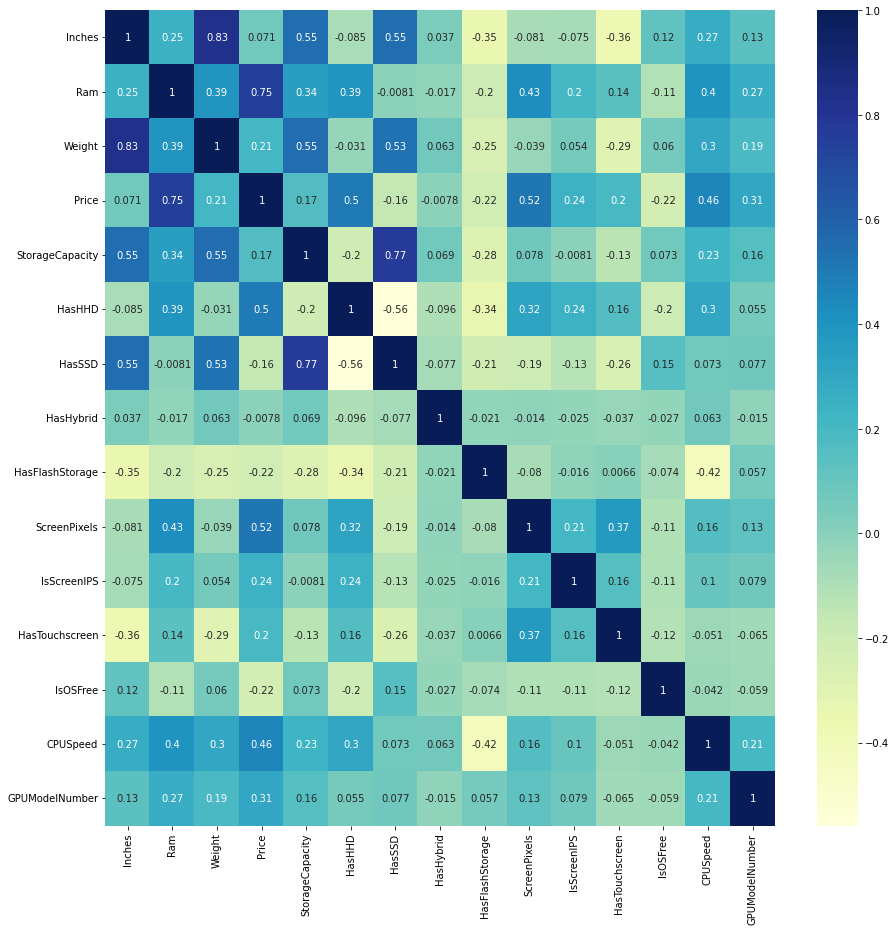

In [ ]:
import seaborn as sns
import pandas as pd

fig, ax = plt.subplots(figsize=(15,15))
data = X_clean.drop(["LaptopId"], axis = 1)

sns.heatmap(data.corr(),annot=True,cmap="YlGnBu", ax=ax)

De primeras las columnas HDD, RAM, ScreenPixels y CPUSpeed parece que son las que más aportan al modelo, y si las dropeamos nuestro modelo empeora considerablemente. Asimismo podemos observar que no hay variables con una correlacion demasiado alta que implique que una de las dos es redundante.

Para poder visualizar mejor la relación Ram/Precio y observar outliers hemos hecho un diagrama de caja y bigotes y un scatterplot.

Text(0.5, 1.0, 'Diagrama de Caja y Bigotes')

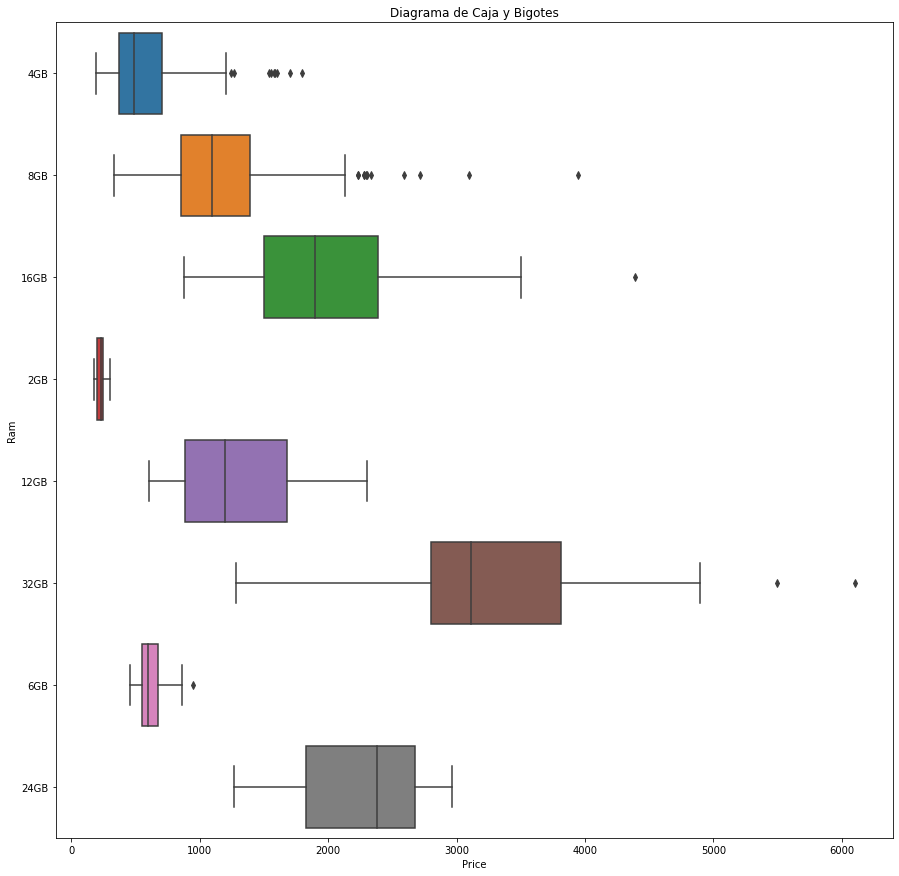

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


fig, ax = plt.subplots(figsize=(15,15))
sns.boxplot(x = X['Price'], y = X['Ram'], data = X)

ax.set_title('Diagrama de Caja y Bigotes')

Los portatiles con mayor RAM suelen ser los más caros, hay alguna excepción en laptops de 8GB y de 4GB ya que la mayoría de los portatiles tienen 4 o 8, y es normal que si hay muchos pueda presentar más diferencias.

Con el scatterplot podemos observar de manera directa que el valor de estas variable genera grandes dependencias con el precio. Cuanto más grande sea el valor de CPUSpeed más cuesta el laptop, si el portatil tiene muchos pixeles tambíen aumenta, y si tiene o no HHD, también es una característica importante cuando hablamos de precios.

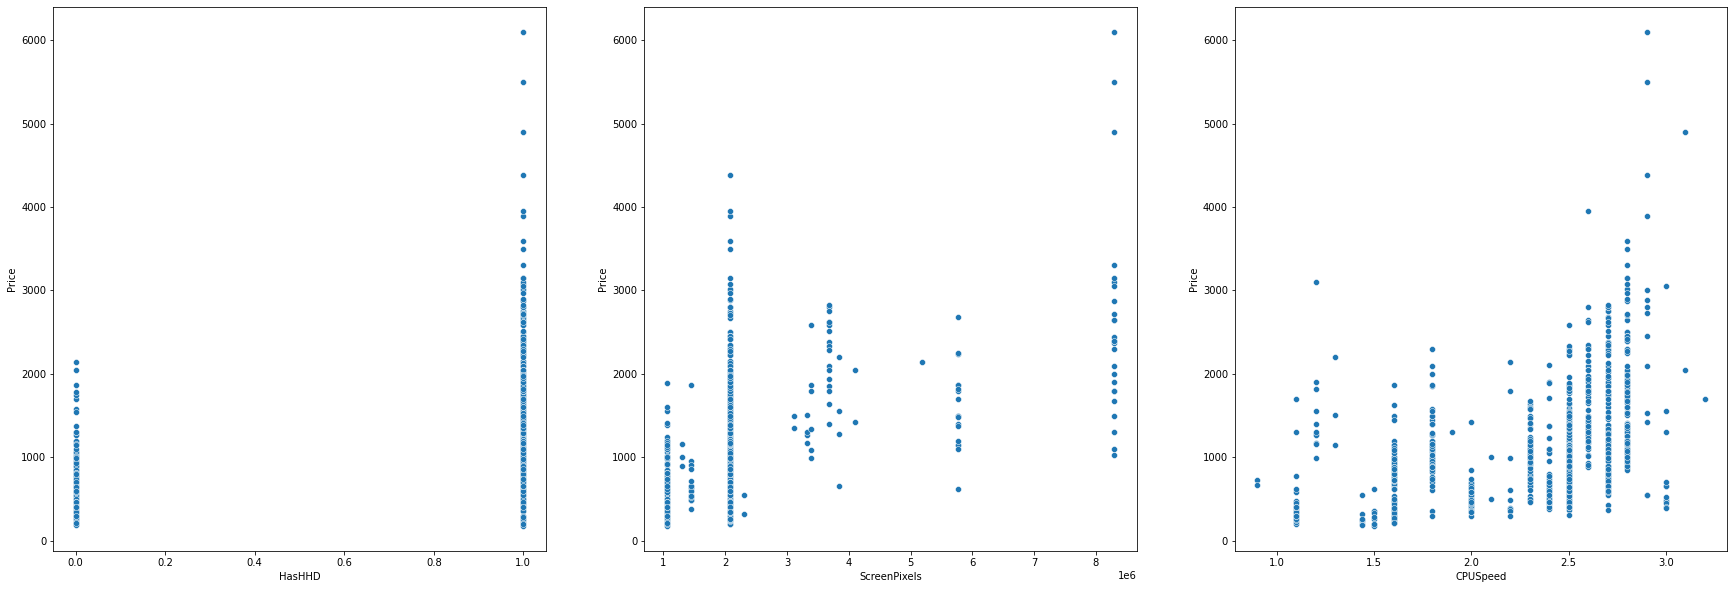

In [ ]:
from traitlets.traitlets import default
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

fig, axs = plt.subplots(1, 3, figsize=(30, 10))


labels = ['HasHHD', 'ScreenPixels', 'CPUSpeed']

j = 0

for i, label in enumerate(labels):
  sns.scatterplot(data=X_clean, x=label, y="Price", ax=axs[j], hue=None)
  
  j+=1

 

Con el scatterplot podemos observar de manera directa que el valor de estas variable genera grandes dependencias con el precio. Cuanto más grande sea el valor de **CPUSpeed** más cuesta el laptop, si el portatil tiene muchos **pixeles** tambíen aumenta, y si tiene o no **HHD**, también es una característica importante cuando hablamos de precios.

Al final nos ha quedado una matriz de 322 columnas con 912 filas en X y 391 filas en Y.

In [ ]:
print("X", X_T.shape)
print("Y", Y_T.shape)

X (912, 322)
Y (391, 322)


# **Entrenando el modelo**

Una vez decididos los datos que vamos a tratar el siguiente paso que hemos seguido ha sido probar varios modelos.

En un principio realizabamos pruebas con hiperparámetros estocasticos, pero para mejorar el proceso de entreno finalmente hemos usado un GridSearch, para encontrar los valores que mejor se adapten a nuestro modelo. LLegando a hacer busquedas superiores a 1 hora, hemos añadido una versión similar a la que hemos usado pero con una busqueda menos compleja, para poder ejecutarla rápidamente, de cara a la realización de la práctica hicimos busquedas de mayor profundidad.

In [ ]:
#
# Ejemplo explicativo. Es lento.
#

import random

reg = RandomForestRegressor()
numero_parametros = 5 
    
clf = GridSearchCV(reg, scoring="neg_mean_absolute_error", cv=numero_parametros, n_jobs=-1, return_train_score=True, param_grid={
    "criterion": ["absolute_error"],
    "random_state": [random.randint(0, 1000000000) for x in range(2)],
    "max_features": [10],
    "max_depth": [50]
})

clf.fit(X_T, X["Price"])

print(clf.cv_results_)
print(clf.best_params_)

{'mean_fit_time': array([3.33363962, 2.00367713]), 'std_fit_time': array([0.20318402, 0.36661244]), 'mean_score_time': array([0.03282952, 0.01989646]), 'std_score_time': array([0.01520148, 0.00477665]), 'param_criterion': masked_array(data=['absolute_error', 'absolute_error'],
             mask=[False, False],
       fill_value='?',
            dtype=object), 'param_max_depth': masked_array(data=[50, 50],
             mask=[False, False],
       fill_value='?',
            dtype=object), 'param_max_features': masked_array(data=[10, 10],
             mask=[False, False],
       fill_value='?',
            dtype=object), 'param_random_state': masked_array(data=[61323147, 674034736],
             mask=[False, False],
       fill_value='?',
            dtype=object), 'params': [{'criterion': 'absolute_error', 'max_depth': 50, 'max_features': 10, 'random_state': 61323147}, {'criterion': 'absolute_error', 'max_depth': 50, 'max_features': 10, 'random_state': 674034736}], 'split0_test_score': 


Hemos usado cross-validation con 5 particiones para reducir el riesgo de overfitting.


In [ ]:
!pip install xgboost==1.0.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 109.7 MB 12 kB/s 
  Attempting uninstall: xgboost
    Found existing installation: xgboost 0.90
    Uninstalling xgboost-0.90:
      Successfully uninstalled xgboost-0.90


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.linear_model import ElasticNet
import statistics as stat
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import BaggingRegressor
import time

# Función auxiliar para obtener los MAEs por cross-validation
def get_avg_std(reg, X, prices, scoring):
    maes = cross_val_score(reg, X, prices, cv=5, scoring=scoring)
    avg = stat.mean(maes)
    std_dev = stat.variance(maes)**(1/2)

    return maes, avg, std_dev

lr = LinearRegression()

elasticnet = ElasticNet(random_state=42, l1_ratio=0.1, alpha=0)


rfreg = RandomForestRegressor(
  criterion="absolute_error",
  max_features=48,
  max_depth=50,
  random_state=600738951)

neigh = KNeighborsRegressor(n_neighbors=5)

xboostreg = XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)

votingreg = VotingRegressor([('lr', lr), ('en', elasticnet), ('rfreg', rfreg)], weights=[1, 1, 2])

baggingreg = BaggingRegressor(base_estimator=rfreg, n_estimators=10, random_state=600738951)

#------------------------- Pruebas ----------------------

datos_reg = {}
regressors = [("LinearRegression", lr), 
              ("ElasticNet", elasticnet), 
              ("KNeighbors", neigh),
              ("Random Forest", rfreg), 
              ("XBoostRegressor", xboostreg),
              ("VotingRegressor (lr, en, rf)", votingreg), 
              ("BaggingRegressor (rf)", baggingreg)
              ]

for reg_name, reg in regressors:
  start_time = time.time()

  maes, avg, std_dev = get_avg_std(reg, X_T, X["Price"], "neg_mean_absolute_error")
  datos_reg[reg_name] = { "avg": avg, "std_dev": std_dev, "time": time.time() - start_time }

for reg_name, reg in regressors:
  maes, r2, _ = get_avg_std(reg, X_T, X["Price"], "r2")
  datos_reg[reg_name]["avg_r2"] = r2


# --- Mostrar los datos por pantalla -----

df = pd.DataFrame()
df["Regresor"]                = datos_reg.keys()
df["Average MAE"]             = [ dato["avg"] for dato in datos_reg.values() ]
df["Standard Deviation MAE"]  = [ dato["std_dev"] for dato in datos_reg.values() ]
df["Average R2"]              = [ dato["avg_r2"] for dato in datos_reg.values() ]
df["time"]                    = [ dato["time"] for dato in datos_reg.values() ]

display(df)

,Regresor,Average MAE,Standard Deviation MAE,Average R2,time
0,LinearRegression,-193.268841,20.105658,0.829191,0.554228
1,ElasticNet,-195.886527,20.367318,0.819260,3.725721
2,KNeighbors,-200.316686,18.564561,0.795024,0.067326
3,Random Forest,-161.601306,6.941305,0.857782,26.156236
4,XBoostRegressor,-150.213814,4.227918,0.883148,19.047120
5,"VotingRegressor (lr, en, rf)",-157.467095,8.874406,0.877489,16.744536
6,BaggingRegressor (rf),-171.127236,12.061241,0.842422,69.677802


# **Predicción**

Después de realizar los diferentes entrenamientos, pasamos a realizar las diferentes predicciones.



1.   LinearRegression
2.   ElasticNet
3.   KNeighbors
4.   RandomForest
5.   XBoostRegressor
6.   VotingRegressor (lr, en, rf)
7.   BaggingRegressor (rf)





**1. LinearRegression**



In [ ]:
trained_model_LR = lr.fit(X_T, X["Price"])

prediccion_LR = trained_model_LR.predict(Y_T)

solucion_LR = pd.DataFrame(data = {
        "LaptopId" : Y["LaptopId"],
        "Price"    : prediccion_LR
    })

pred = solucion_LR.to_csv("LinearRegression.csv", index = False)
display(solucion_LR)

,LaptopId,Price
0,891,1746.700666
1,1149,1653.760287
2,962,972.782665
3,1204,1176.735172
4,1139,1807.999997
...,...,...
386,268,1158.763550
387,1278,57.629780
388,299,1686.827345
389,162,765.866922


DataFrame de los laptops que teniamos que predecir, y nos guardamos un csv con los datos obtenidos.

Con el 50% del dataset de test:

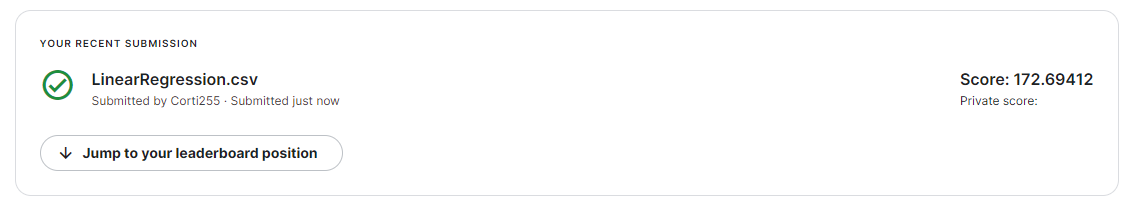

Con el 100% del dataset de test:

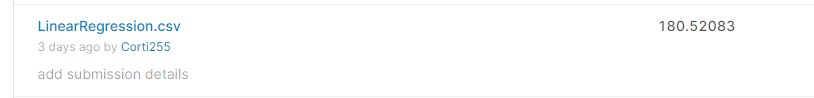

**2. ElasticNet**

In [ ]:
trained_model_E = elasticnet.fit(X_T, X["Price"])

prediction_E = trained_model_E.predict(Y_T)

solucion_E = pd.DataFrame(data = {
        "LaptopId" : Y["LaptopId"],
        "Price"    : prediction_E
    })

pred = solucion_E.to_csv("ElasticNet.csv", index=False)
display(solucion_E)

,LaptopId,Price
0,891,1746.939953
1,1149,1653.884107
2,962,972.971336
3,1204,1177.012523
4,1139,1808.244870
...,...,...
386,268,1159.390084
387,1278,58.430368
388,299,1686.993098
389,162,766.289596


DataFrame de los laptops que teniamos que predecir, y nos guardamos un csv con los datos obtenidos.

Score del kaggle

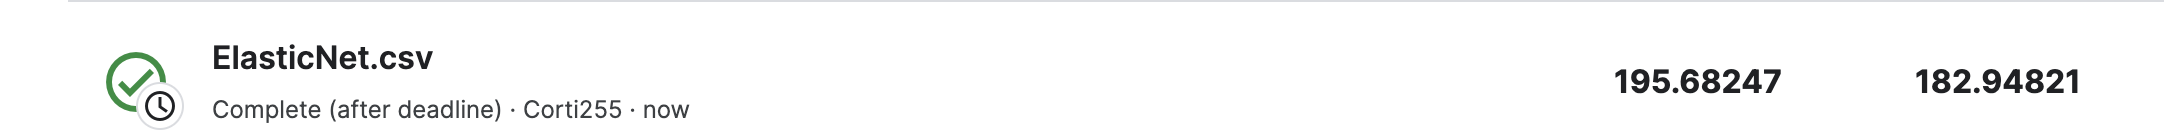

**3. KNeighbors**

In [ ]:
trained_model_KN = neigh.fit(X_T, X["Price"])

prediction_KN = trained_model_KN.predict(Y_T)

solucion_RF = pd.DataFrame(data = {
        "LaptopId" : Y["LaptopId"],
        "Price"    : prediction_KN
    })

pred = solucion_RF.to_csv("KNeighbors.csv", index=False)
display(solucion_RF)

,LaptopId,Price
0,891,2352.600
1,1149,2058.484
2,962,784.000
3,1204,1218.400
4,1139,1568.640
...,...,...
386,268,1067.600
387,1278,414.896
388,299,1424.780
389,162,806.642


DataFrame de los laptops que teniamos que predecir, y nos guardamos un csv con los datos obtenido

Score del kaggle

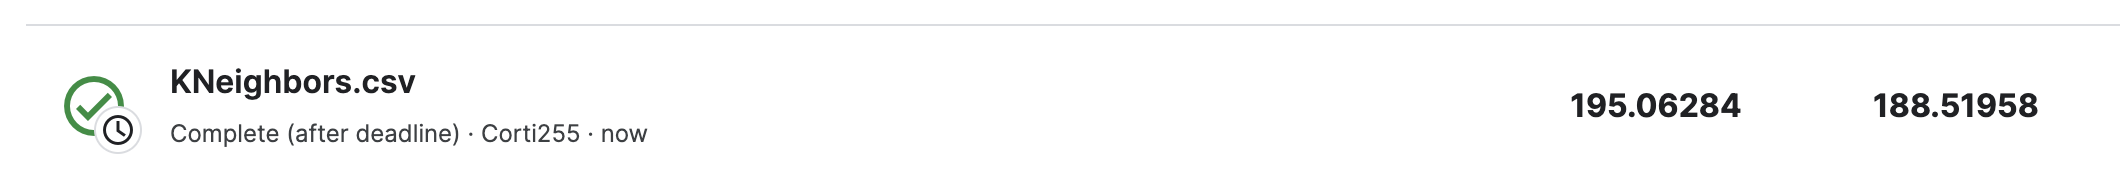

**4. RandomForest**

In [ ]:
trained_model_RF = rfreg.fit(X_T, X["Price"])

prediction_RF = trained_model_RF.predict(Y_T)

solucion_RF = pd.DataFrame(data = {
        "LaptopId" : Y["LaptopId"],
        "Price"    : prediction_RF
    })

pred = solucion_RF.to_csv("RandomForest.csv", index=False)
display(solucion_RF)

,LaptopId,Price
0,891,1978.86480
1,1149,1832.76990
2,962,928.06180
3,1204,1174.64390
4,1139,1437.71110
...,...,...
386,268,994.36490
387,1278,336.79030
388,299,1811.05350
389,162,814.79795


DataFrame de los laptops que teniamos que predecir, y nos guardamos un csv con los datos obtenidos.

Con el 50% del dataset de test:

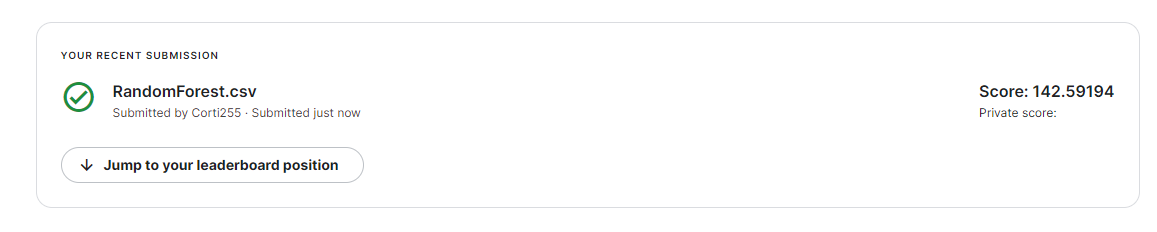

Con el 100% del dataset de test:

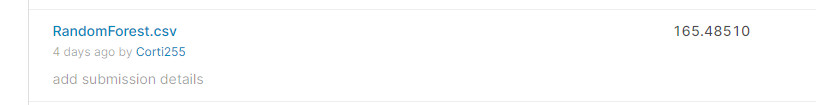

Impriminos parte del árbol que utiliza nuestro RandomForest. Guardando las decisiones que ha tomado.

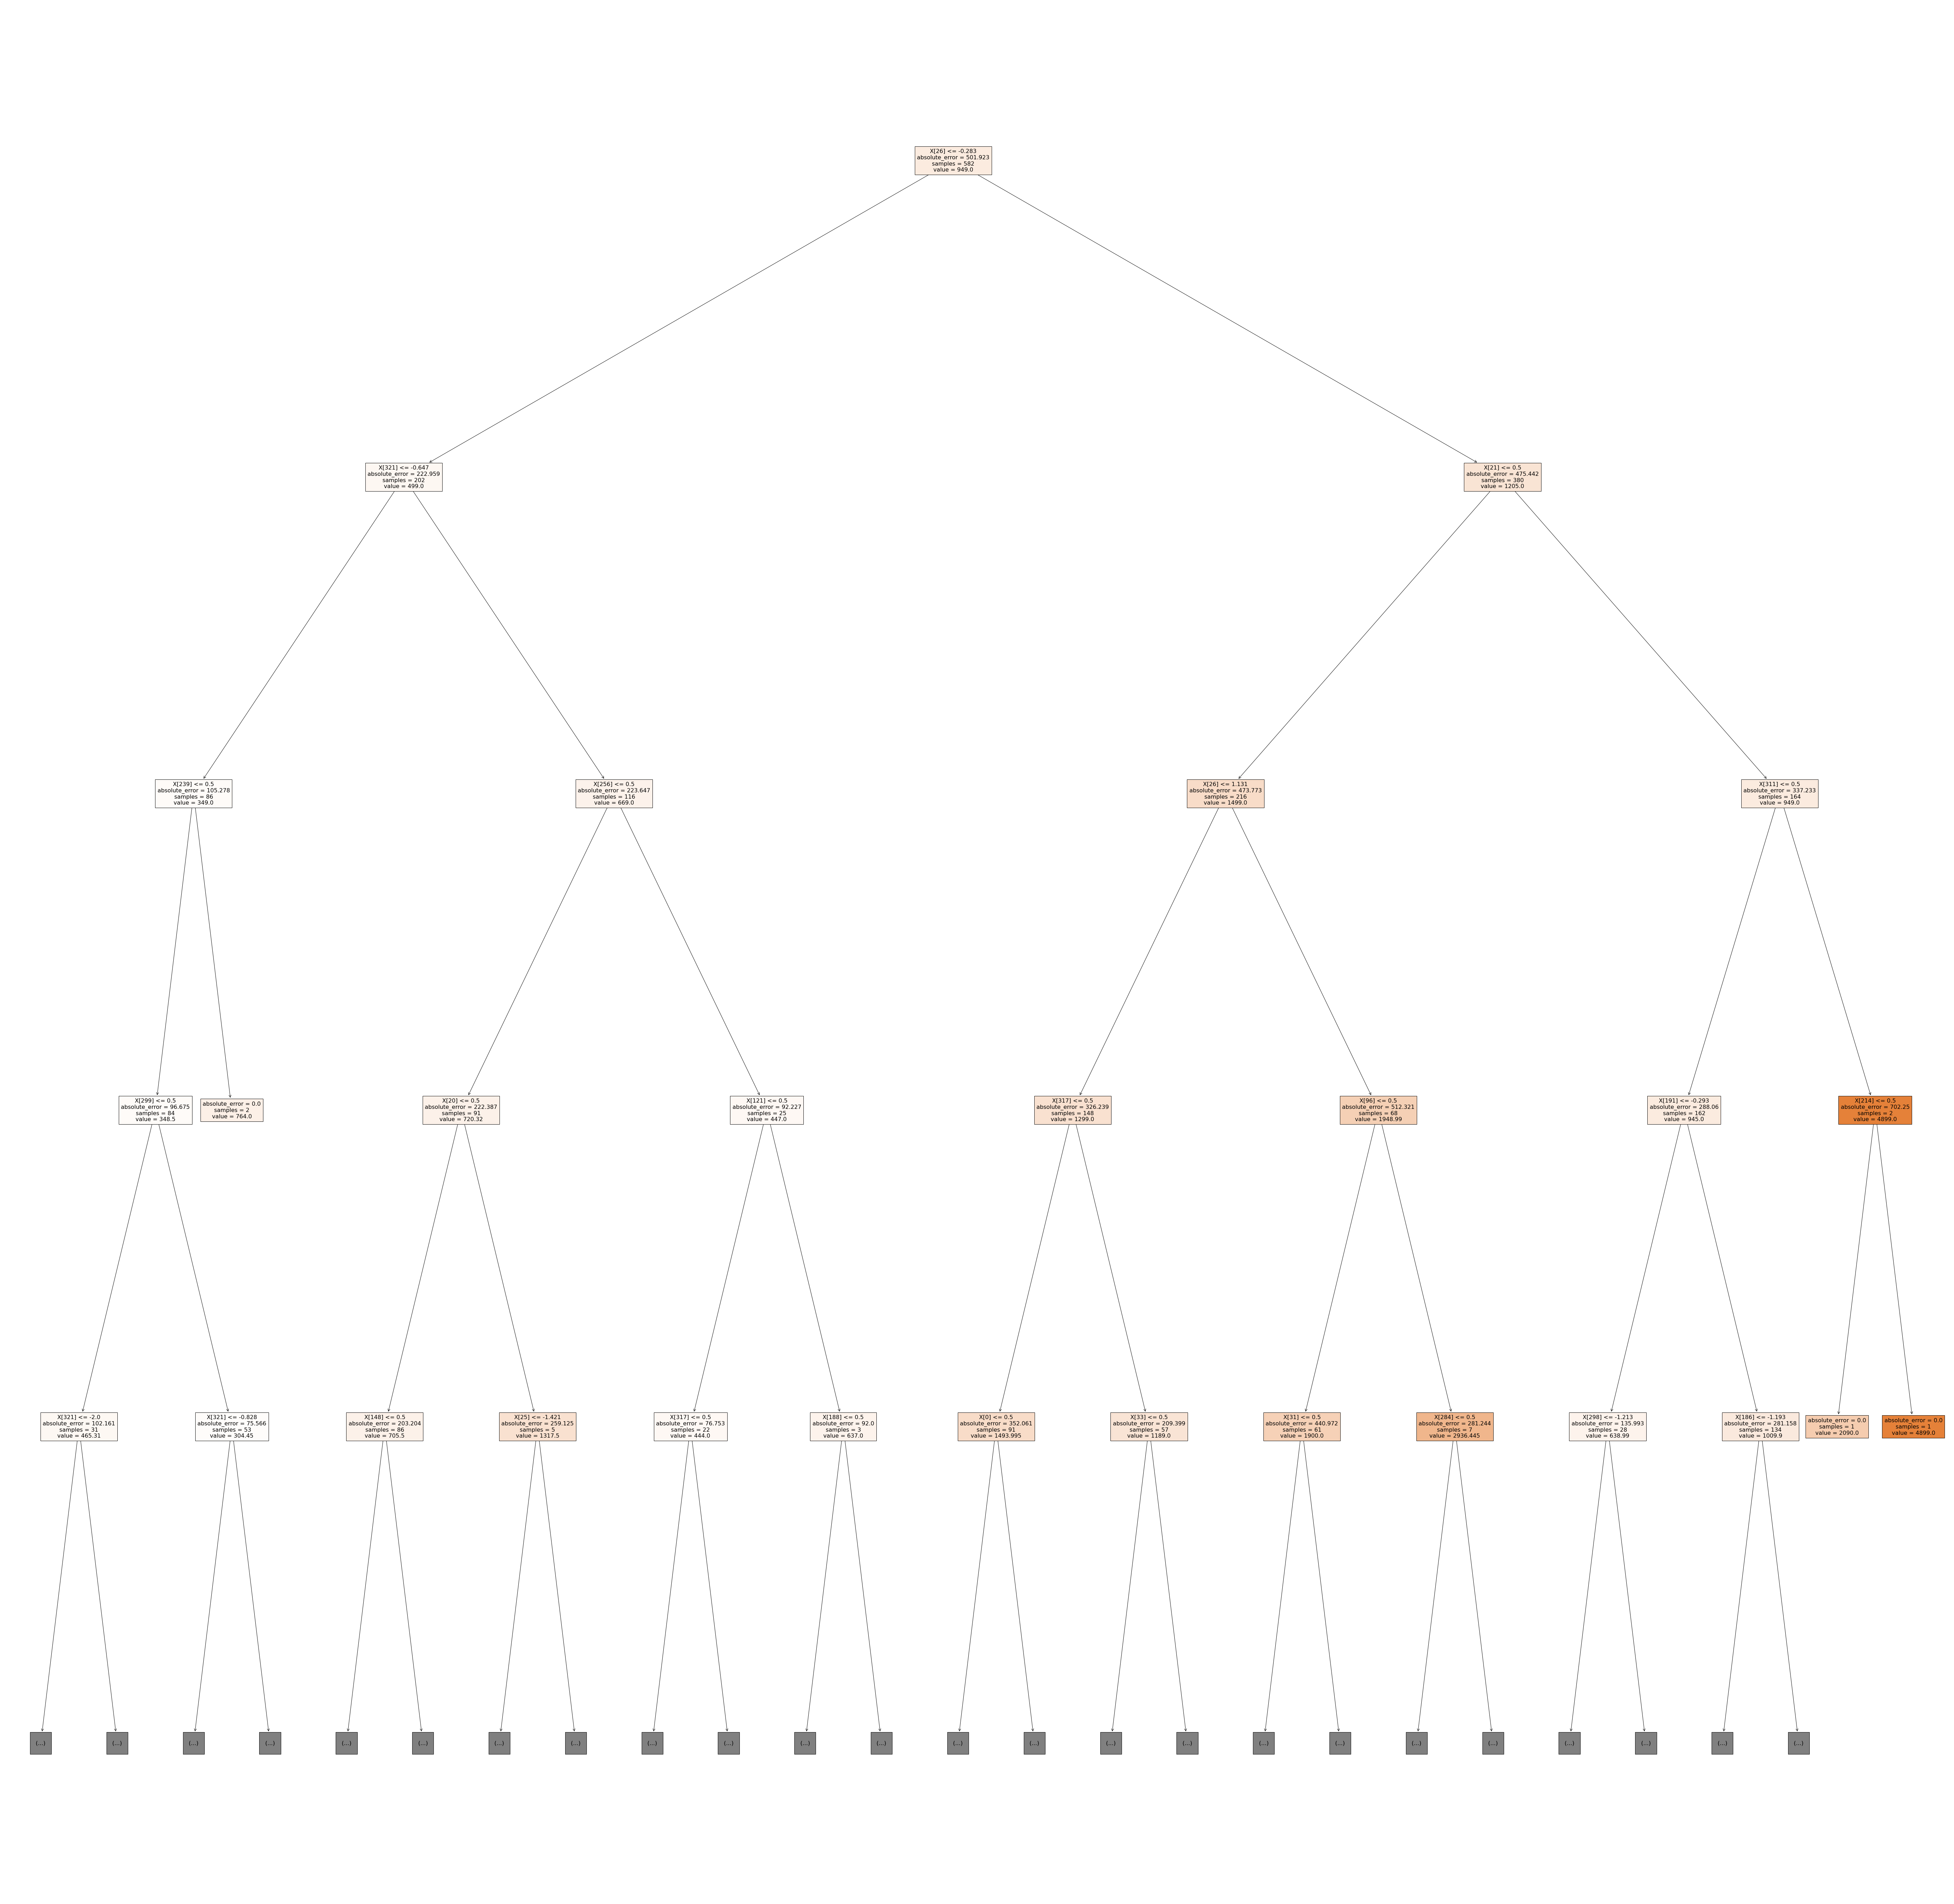

In [ ]:
from sklearn import tree

max_depth=4                  #@param {type:"slider", min:0, max:50,  step:1}
max_saves=3                  #@param {type:"slider", min:0, max:100,  step:1}
PNG = True                   #@param {type:"boolean"}
PDF = True                   #@param {type:"boolean"}
SVG = True                   #@param {type:"boolean"}

fig, axs = plt.subplots(figsize=(100,100))
cont = 0

while (cont<max_saves):
  tree.plot_tree(trained_model_RF.estimators_[cont], max_depth = max_depth, filled=True, ax = axs)
  if (PNG):
    fig.savefig(str(cont)+'_tree.png')
  if (PDF):
    fig.savefig(str(cont)+'_tree.pdf')
  if (SVG):
    fig.savefig(str(cont)+'_tree.svg')
  cont+=1


Un Random Forest es un conjunto (ensemble) de árboles de decisión (100) combinados con bagging. 

Al usar bagging, lo que en realidad está pasando, es que distintos árboles ven distintas porciones de los datos. Ningún árbol ve todos los datos de entrenamiento. Cada árbol se entrena de manera particular con distintas muestras de datos para una mismo feature. De esta forma, al combinar sus resultados, unos errores se compensan con otros y tenemos una predicción que generaliza mejor el modelo.

Si observamos el proceso, el modelo escoge una feature para estudiar el problema, en base a una condición y a el absolute_error decide seguir explorando o terminar la rama, si el error es nulo.

Un ejemplo sería la decisión del árbol 0, primero evalua la característica de columna 20 y bifurca la exploración si la relación con la variable objetivo es mayor o menor a 0,5. Este algoritmo sigue procesando los datos hasta llegar a la profundidad indicada, en nuestro caso 50, y generar una predicción.

**5. XBoostRegressor**

In [ ]:
trained_model_XB = xboostreg.fit(X_T, X["Price"])

prediction_XB = trained_model_XB.predict(Y_T)

solucion_XB = pd.DataFrame(data = {
        "LaptopId" : Y["LaptopId"],
        "Price"    : prediction_XB
    })

pred = solucion_XB.to_csv("XBoostRegressor.csv", index=False)
display(solucion_XB)

,LaptopId,Price
0,891,2228.434326
1,1149,1916.530029
2,962,946.398743
3,1204,1181.775391
4,1139,1656.463013
...,...,...
386,268,1002.064697
387,1278,312.434479
388,299,1736.649658
389,162,756.073303


DataFrame de los laptops que teniamos que predecir, y nos guardamos un csv con los datos obtenidos.

Con el 50% del dataset de test:

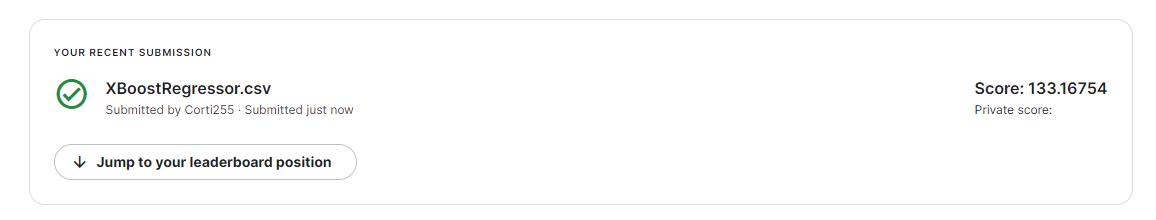

Con el 100% del dataset de test:

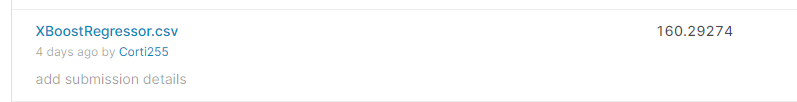

**6. VotingRegressor (lr, en, rf)**

In [ ]:
trained_model_VR = votingreg.fit(X_T, X["Price"])

prediction_VR = trained_model_VR.predict(Y_T)

solucion_VR = pd.DataFrame(data = {
        "LaptopId" : Y["LaptopId"],
        "Price"    : prediction_VR
    })

pred = solucion_VR.to_csv("VotingRegressor.csv", index=False)
display(solucion_VR)

,LaptopId,Price
0,891,1862.842555
1,1149,1743.296048
2,962,950.469400
3,1204,1175.758874
4,1139,1622.916767
...,...,...
386,268,1076.720858
387,1278,197.410187
388,299,1748.981861
389,162,790.438105


DataFrame de los laptops que teniamos que predecir, y nos guardamos un csv con los datos obtenidos.

Con el 50% del dataset de test:

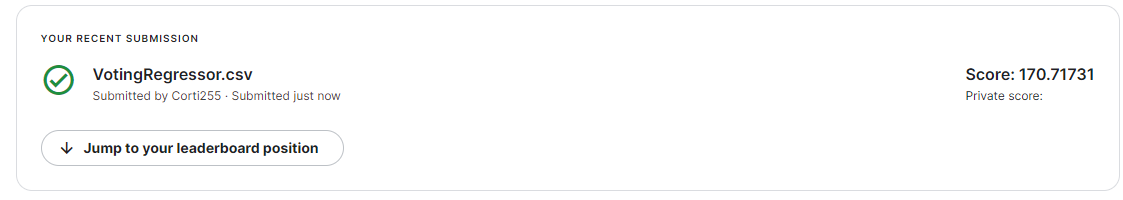

Con el 100% del dataset de test:

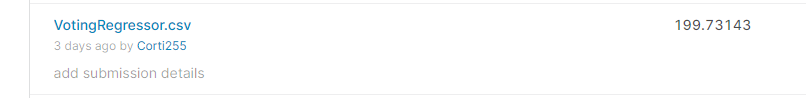

**7. BaggingRegressor (rf)**

In [ ]:
trained_model_BR = baggingreg.fit(X_T, X["Price"])

prediction_BR = trained_model_BR.predict(Y_T)

solucion_BR = pd.DataFrame(data = {
        "LaptopId" : Y["LaptopId"],
        "Price"    : prediction_BR
    })

pred = solucion_BR.to_csv("BaggingRegressor.csv", index=False)
display(solucion_BR)

,LaptopId,Price
0,891,1965.321490
1,1149,1755.327055
2,962,954.195120
3,1204,1149.103550
4,1139,1465.925855
...,...,...
386,268,971.096440
387,1278,364.612680
388,299,1740.368055
389,162,817.972300


DataFrame de los laptops que teniamos que predecir, y nos guardamos un csv con los datos obtenidos.

Con el 50% del dataset de test:

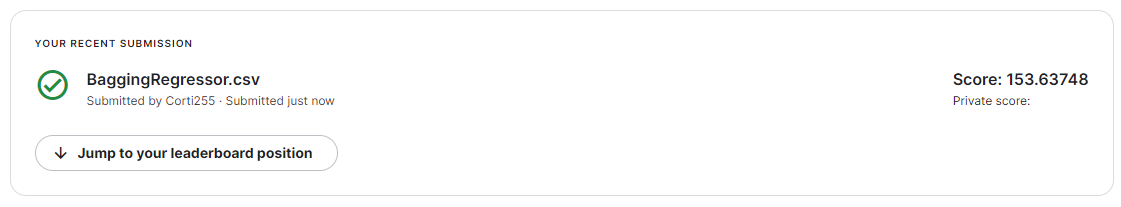

Con el 100% del dataset de test:

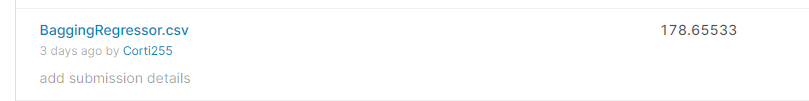

Los resultados que hemos ido obteniendo a lo largo del tiempo:

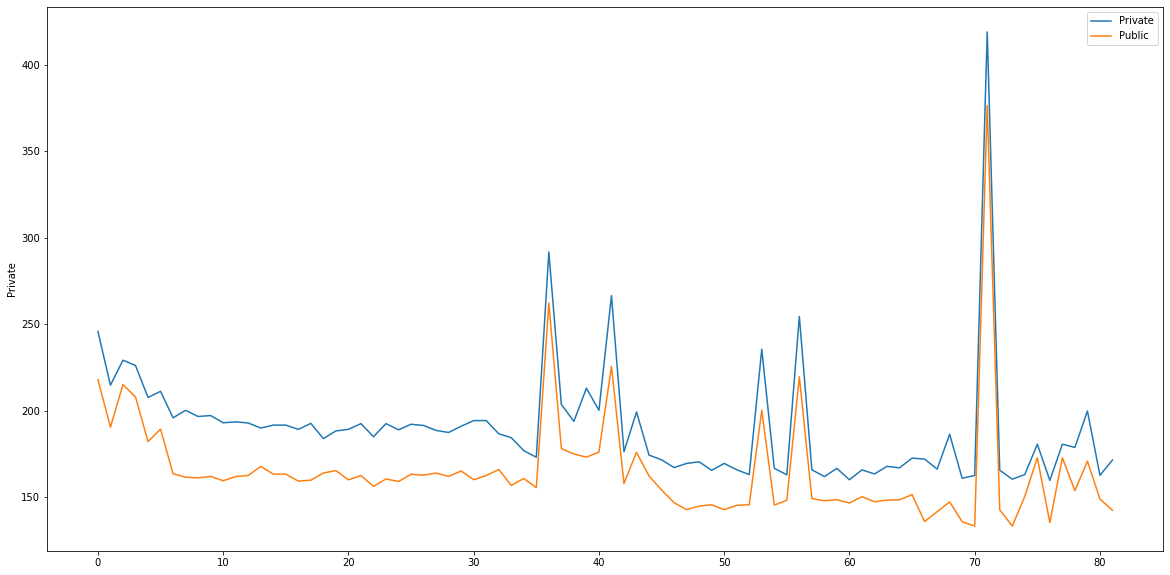

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

submissions = pd.read_csv("https://gitlab.com/villainnumber1/filesml/-/raw/main/submissionsOrdered.csv", sep=",")
fig, ax = plt.subplots(1,1,figsize=(20, 10))

sns.lineplot(data=submissions["Private"], label="Private", ax=ax)
sns.lineplot(data=submissions["Public"], label="Public", ax=ax)


# **Conclusiones**

En general el proceso que hemos seguido ha sido:

1. Preprocesar los datos
2. Buscar hiperparametros
3. Entrenar y probar cada modelo
4. Contrastar el resultado con kaggle
5. Volver al punto 1

Hay algunas aproximaciones que aunque sean razonables no nos han dado buenos resultados, como tratar la RAM como una variable categórica con OrdinalEncoder o añadir gamas para la cpu o gpu, tampoco nos ha servido mucho añadir una columna por cada tipo de disco con la suma de las capacidades para un determinado portatil.

Para los argumentos dados a los regresores hemos leido la documentación e intentado probar aquellos que parecían más relevantes y hemos dejado aquellos que nos han dado mejor resultado teniendo en cuenta el posible overfitting.

Tambien hemos probado usando más Pipelines con PolynomicFeatures al transformas las columnas pero la tasa de error no hacia más que subir tanto para el MSE como en Kaggle, a pesar de que el scatterplot con respecto a precio tenía forma logarítmica o polinómica con grado 2.

En general hemos intentado hacer un procesamiento que tuviese sentido en contraste con el que hicimos para le prepráctica, que nos llevó a tener un overfitting bastante grande.
